<a href="https://colab.research.google.com/github/bdi2357/DataAnalyticsWithChatGPT/blob/main/EDA/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp drive/MyDrive/telecom_churn_data.csv .
!cp drive/MyDrive/DataDictionary-TelecomChurnCaseStudy.xlsx .

In [3]:
import pandas as pd

# Load the data dictionary file
data_dictionary_path = 'DataDictionary-TelecomChurnCaseStudy.xlsx'
data_dictionary = pd.read_excel(data_dictionary_path)

data_dictionary.head()


,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls


In [4]:
# Load the telecom churn data file
telecom_churn_data_path = 'telecom_churn_data.csv'
telecom_churn_data = pd.read_csv(telecom_churn_data_path)

# Display the first few rows of the telecom churn data
telecom_churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
# Get the number of rows and columns in the telecom churn data
num_rows, num_columns = telecom_churn_data.shape
num_rows, num_columns


(99999, 226)

In [6]:
# Viewing the first 5 rows of the data
first_5_rows = telecom_churn_data.head()

# Viewing the last 5 rows of the data
last_5_rows = telecom_churn_data.tail()

# Viewing a random sample of 5 rows from the data
random_sample = telecom_churn_data.sample(5)

# Getting the column names
column_names = telecom_churn_data.columns.tolist()

# Finding the data types of each column
data_types = telecom_churn_data.dtypes

# Finding the number of different values for each column (for a sample of columns due to large number)
sample_columns = telecom_churn_data.columns[:10]  # Sample first 10 columns for demonstration
distinct_values_counts = telecom_churn_data[sample_columns].nunique()

# Determining the number of NaNs or None for each column
nan_counts = telecom_churn_data.isna().sum()

first_5_rows, last_5_rows, random_sample, column_names[:], data_types[:], distinct_values_counts, nan_counts[:]


(   mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
 0     7000842753        109             0.0             0.0             0.0   
 1     7001865778        109             0.0             0.0             0.0   
 2     7001625959        109             0.0             0.0             0.0   
 3     7001204172        109             0.0             0.0             0.0   
 4     7000142493        109             0.0             0.0             0.0   
 
   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
 0            6/30/2014            7/31/2014            8/31/2014   
 1            6/30/2014            7/31/2014            8/31/2014   
 2            6/30/2014            7/31/2014            8/31/2014   
 3            6/30/2014            7/31/2014            8/31/2014   
 4            6/30/2014            7/31/2014            8/31/2014   
 
   last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
 0            9/30/2014  1

In [7]:
import pandas as pd

# Assuming the DataFrame is named telecom_churn_data
# telecom_churn_data = pd.read_csv('path_to_your_csv_file.csv')

# 2.1 Viewing the 5 first rows, 5 last rows, and a random sample of the data
first_5_rows = telecom_churn_data.head()
last_5_rows = telecom_churn_data.tail()
random_sample = telecom_churn_data.sample(5)

# 2.2 Determining the shape of the data
num_rows, num_columns = telecom_churn_data.shape

# 2.3 Listing the column names
column_names = telecom_churn_data.columns.tolist()

# 2.4 Finding the data types of each column
data_types = telecom_churn_data.dtypes

# 2.5 Finding the number of different values for each column
# (for large datasets, take a sample of columns)
sample_columns = telecom_churn_data.columns[:10]  # Sample first 10 columns
distinct_values_counts = telecom_churn_data[sample_columns].nunique()

# 2.6 Determining the number of NaNs or None for each column
nan_counts = telecom_churn_data.isna().sum()

# Display the results
print("First 5 Rows:\n", first_5_rows)
print("\nLast 5 Rows:\n", last_5_rows)
print("\nRandom Sample of 5 Rows:\n", random_sample)
print("\nShape of Data:", num_rows, "rows and", num_columns, "columns")
print("\nSample Column Names:", column_names[:10])
print("\nSample Data Types for First 10 Columns:\n", data_types[:10])
print("\nNumber of Distinct Values in First 10 Columns:\n", distinct_values_counts)
print("\nNumber of NaNs in First 10 Columns:\n", nan_counts[:10])


First 5 Rows:
    mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  19

In [8]:
# Calculating the percentage of NaN values for each column
nan_percentage = (telecom_churn_data.isna().sum() / len(telecom_churn_data)) * 100

# Finding columns with more than 1% NaN values
columns_with_more_than_1_percent_nan = nan_percentage[nan_percentage > 1].index.tolist()

# Display the columns and their respective NaN percentages
nan_percentage_in_high_nan_columns = nan_percentage[columns_with_more_than_1_percent_nan]
print(columns_with_more_than_1_percent_nan)
print(nan_percentage_in_high_nan_columns)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_8', 'last_date_of_month_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_t2c_m

In [9]:
nan_percentage_in_high_nan_columns.shape

(165,)

In [10]:
telecom_churn_data.shape

(99999, 226)

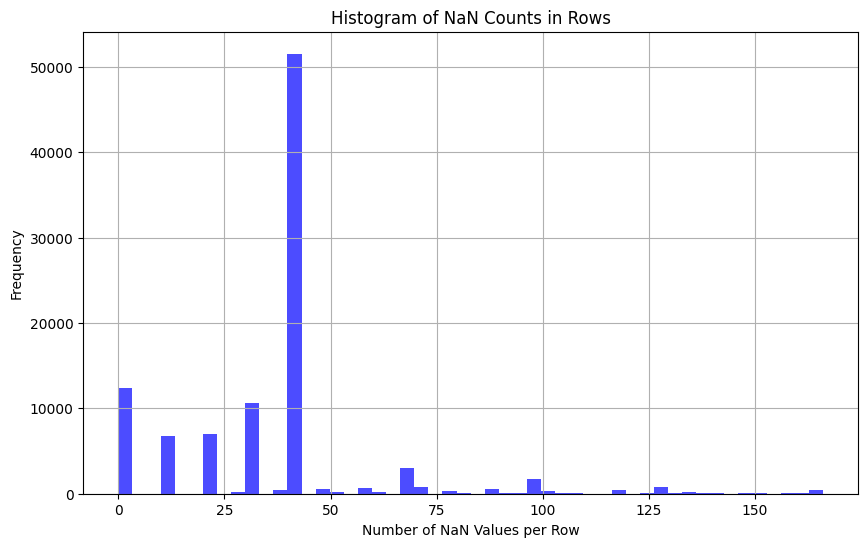

In [11]:
import matplotlib.pyplot as plt

# Counting the number of NaN values in each row
nan_counts_per_row = telecom_churn_data.isna().sum(axis=1)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(nan_counts_per_row, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of NaN Counts in Rows')
plt.xlabel('Number of NaN Values per Row')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [12]:
# Finding the most frequent number of NaN values per row
most_frequent_nan_count = nan_counts_per_row.value_counts().idxmax()
most_frequent_nan_count_frequency = nan_counts_per_row.value_counts().max()

# Displaying the most frequent NaN count and its frequency
print("Most Frequent Number of NaN Values per Row:", most_frequent_nan_count)
print("Frequency of this NaN Count:", most_frequent_nan_count_frequency)


Most Frequent Number of NaN Values per Row: 40
Frequency of this NaN Count: 48325


In [13]:
# Counting the number of rows with NaN values above a certain threshold (e.g., 40)
nan_threshold = 40
rows_above_threshold = nan_counts_per_row[nan_counts_per_row > nan_threshold].count()

# Displaying the result
print(f"Number of rows with more than {nan_threshold} NaN values: {rows_above_threshold} , proportion { rows_above_threshold /telecom_churn_data.shape[0]}")

Number of rows with more than 40 NaN values: 14225 , proportion 0.14225142251422515


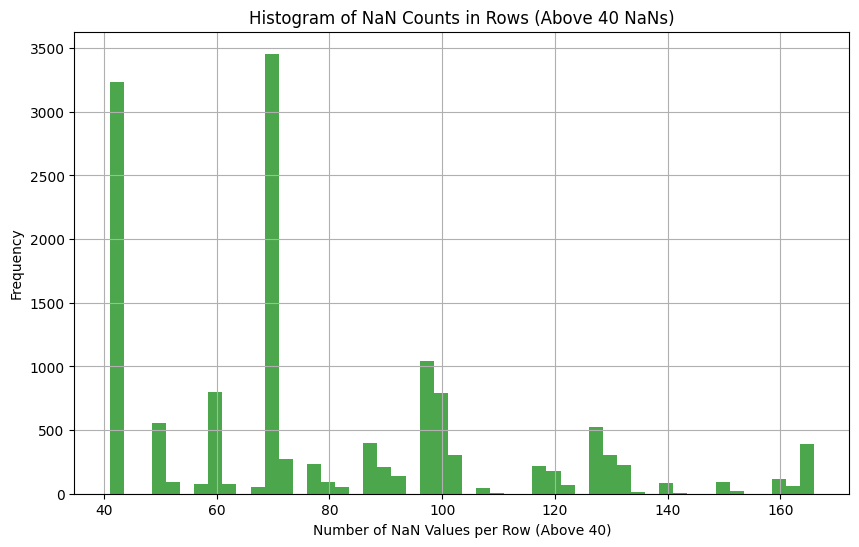

In [14]:
import matplotlib.pyplot as plt

# Creating a histogram for the distribution of the number of NaN values above a certain threshold
nan_threshold = 40

# Filtering rows with NaN counts above the threshold
rows_above_threshold = nan_counts_per_row[nan_counts_per_row > nan_threshold]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(rows_above_threshold, bins=50, color='green', alpha=0.7)
plt.title(f'Histogram of NaN Counts in Rows (Above {nan_threshold} NaNs)')
plt.xlabel(f'Number of NaN Values per Row (Above {nan_threshold})')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [15]:
# Counting the number of rows with NaN values above a certain threshold (e.g., 40)
nan_threshold = 140
rows_above_threshold = nan_counts_per_row[nan_counts_per_row > nan_threshold].count()

# Displaying the result
print(f"Number of rows with more than {nan_threshold} NaN values: {rows_above_threshold} , proportion { rows_above_threshold /telecom_churn_data.shape[0]}")

Number of rows with more than 140 NaN values: 679 , proportion 0.0067900679006790065


In [16]:
# Completeness Check: Looking for zero or blank values in key columns
# Identifying columns which should not have zeros or blank strings

# Sample columns to check for zeros (assuming these columns should not have zero values)
columns_to_check_zeros = ['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9']  # Average Revenue Per User for different months

# Counting zeros in these columns
zeros_count = {col: (telecom_churn_data[col] == 0).sum() for col in columns_to_check_zeros}

# Uniformity Check: Ensuring consistent formatting in similar columns
# Checking date columns for consistent formatting
date_columns = [col for col in telecom_churn_data.columns if 'date' in col]
date_format_consistency = {col: telecom_churn_data[col].str.match(r'\d{1,2}/\d{1,2}/\d{4}').all() for col in date_columns if telecom_churn_data[col].dtype == 'object'}

# Range and Logical Consistency: Examining a few numerical columns
# Example: Check if numerical values are within a reasonable range
# Checking 'aon' column - Age on network (in days)
aon_range = telecom_churn_data['aon'].agg(['min', 'max'])

zeros_count, date_format_consistency, aon_range



({'arpu_6': 3731, 'arpu_7': 3862, 'arpu_8': 5622, 'arpu_9': 9069},
 {'last_date_of_month_6': True,
  'last_date_of_month_7': True,
  'last_date_of_month_8': True,
  'last_date_of_month_9': True,
  'date_of_last_rech_6': True,
  'date_of_last_rech_7': True,
  'date_of_last_rech_8': True,
  'date_of_last_rech_9': True,
  'date_of_last_rech_data_6': True,
  'date_of_last_rech_data_7': True,
  'date_of_last_rech_data_8': True,
  'date_of_last_rech_data_9': True},
 min     180
 max    4337
 Name: aon, dtype: int64)

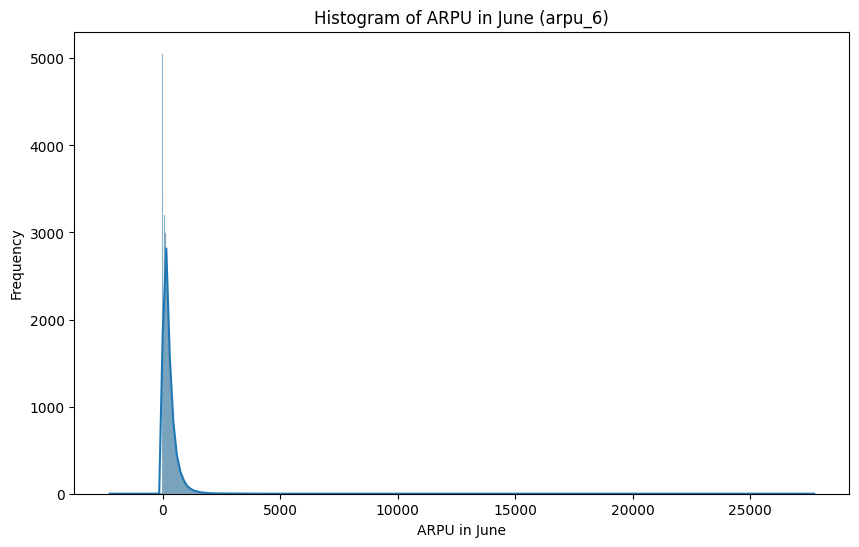

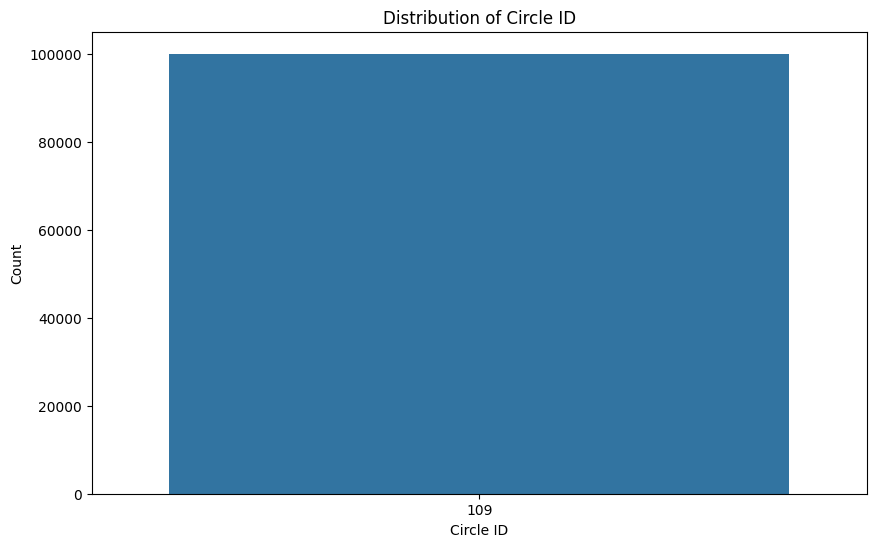

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis
# For this example, let's consider 'arpu_6' (average revenue per user in June) as a numerical column
# and 'circle_id' as a categorical column for demonstration

# Numerical Data: Histogram of 'arpu_6'
plt.figure(figsize=(10, 6))
sns.histplot(telecom_churn_data['arpu_6'], kde=True)
plt.title('Histogram of ARPU in June (arpu_6)')
plt.xlabel('ARPU in June')
plt.ylabel('Frequency')
plt.show()

# Categorical Data: Distribution of 'circle_id'
plt.figure(figsize=(10, 6))
sns.countplot(x='circle_id', data=telecom_churn_data)
plt.title('Distribution of Circle ID')
plt.xlabel('Circle ID')
plt.ylabel('Count')
plt.show()



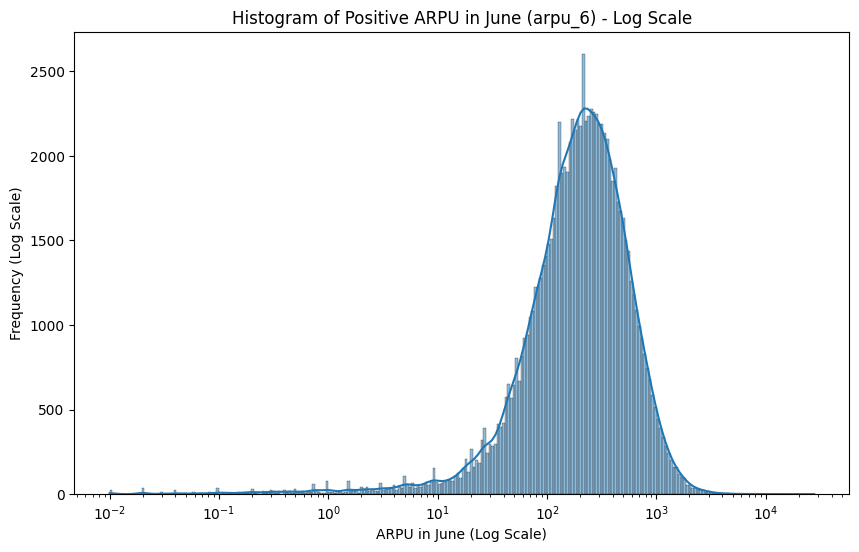

In [18]:
# Filtering out non-positive values for the 'arpu_6' column
arpu_6_positive = telecom_churn_data['arpu_6'][telecom_churn_data['arpu_6'] > 0]

# Plotting the histogram of positive 'arpu_6' values on a log scale
plt.figure(figsize=(10, 6))
sns.histplot(arpu_6_positive, kde=True, log_scale=True)
plt.title('Histogram of Positive ARPU in June (arpu_6) - Log Scale')
plt.xlabel('ARPU in June (Log Scale)')
plt.ylabel('Frequency (Log Scale)')
plt.show()



In [19]:
# Define churn based on usage in the last month (September, columns with suffix '_9')
# Considering both call minutes and data usage

# Columns for call minutes and data usage in September
call_columns_sept = [col for col in telecom_churn_data.columns if col.endswith('_9') and ('_mou' in col or '_vol' in col)]

# Checking if all usage columns are zero in September
telecom_churn_data['churn'] = telecom_churn_data[call_columns_sept].sum(axis=1) == 0

# Converting the churn flag to integer type (1 for churned, 0 for not churned)
telecom_churn_data['churn'] = telecom_churn_data['churn'].astype(int)

# Viewing the first few rows to confirm the churn column is added
telecom_churn_data[['churn'] + call_columns_sept].head()


,churn,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,...,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,total_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN
1,0,18.34,53.76,0.00,0.00,18.34,53.76,0.00,0.00,72.11,...,0.00,173.03,0.00,15.01,0.00,0.0,15.01,188.04,0.00,0.00
2,0,74.81,118.91,38.49,70.94,14.39,28.16,22.24,0.48,64.81,...,158.19,345.41,49.44,118.18,3.86,0.0,171.49,517.74,0.45,0.01
3,0,241.71,113.54,0.00,0.00,15.49,65.46,2.06,0.00,83.03,...,65.59,160.19,129.84,13.98,0.00,0.0,143.83,305.38,0.55,0.00
4,0,58.78,45.81,0.00,0.00,58.78,37.89,1.93,0.00,98.61,...,0.00,202.81,2.31,0.00,0.00,0.0,2.31,205.31,0.18,0.00


<Axes: xlabel='arpu_6', ylabel='Count'>

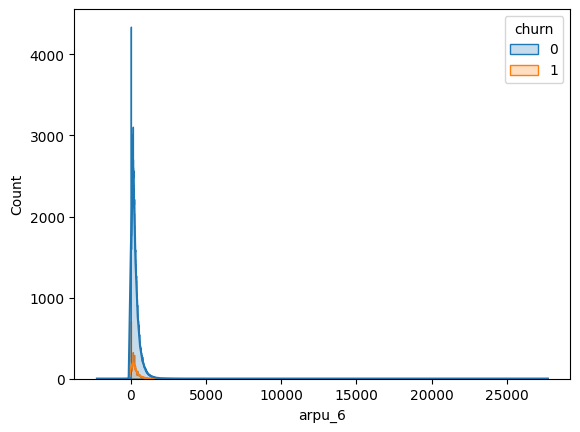

In [20]:
sns.histplot(data=telecom_churn_data, x='arpu_6', hue='churn', element='step', kde=True)


In [21]:
telecom_churn_data[telecom_churn_data['churn'] == 1].shape[0] / telecom_churn_data.shape[0]

0.07745077450774508

<Axes: xlabel='churn'>

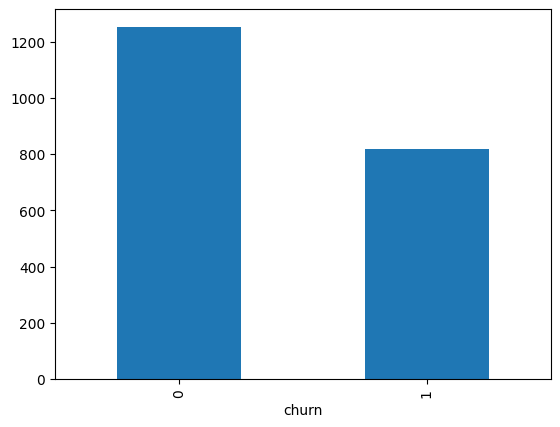

In [22]:
average_aon_by_churn = telecom_churn_data.groupby('churn')['aon'].mean()
average_aon_by_churn.plot(kind='bar')

In [23]:
telecom_churn_data.columns.tolist()

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

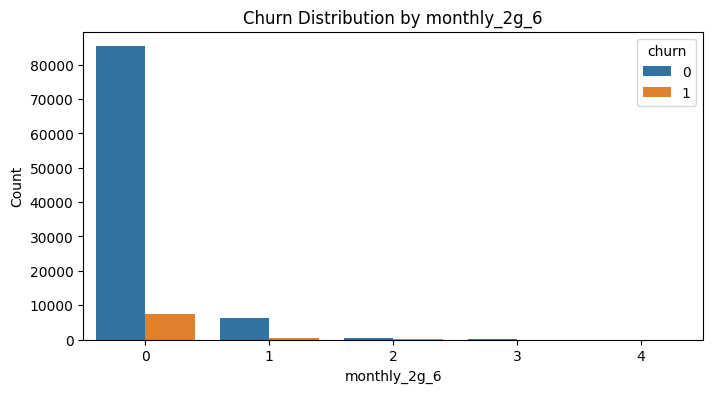

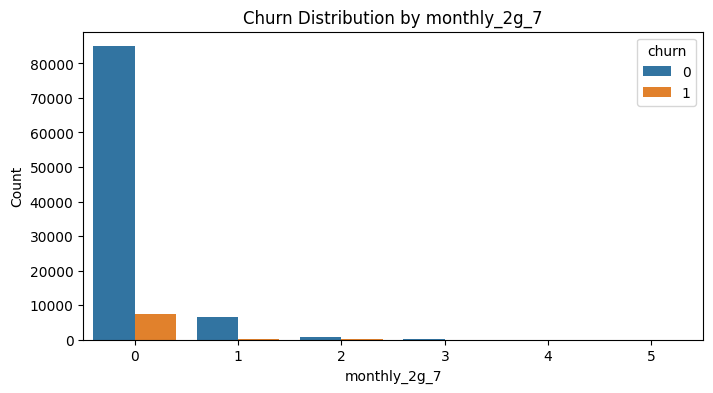

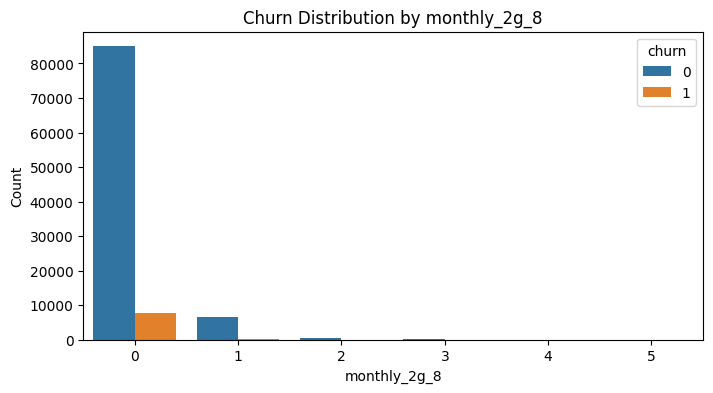

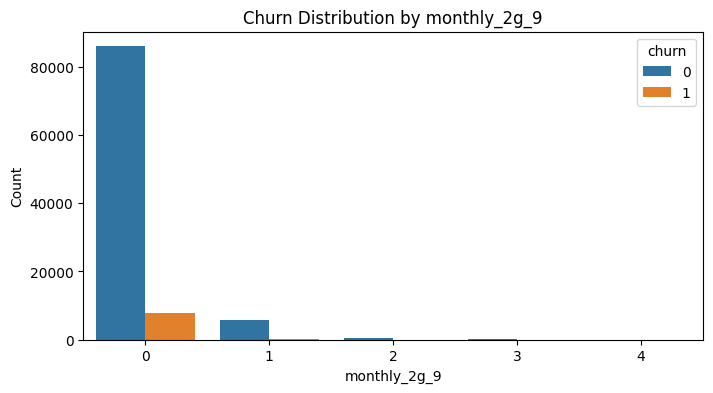

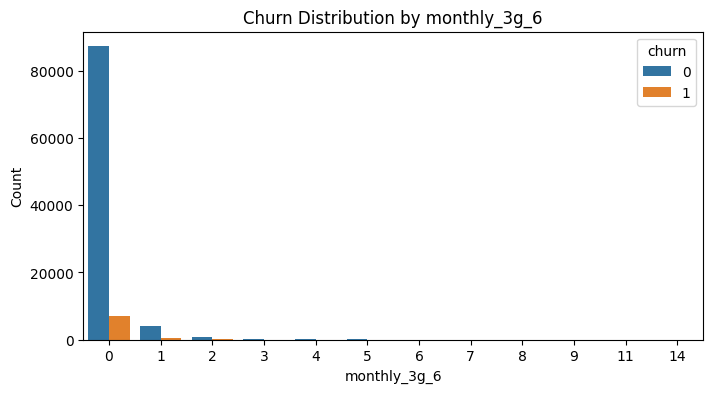

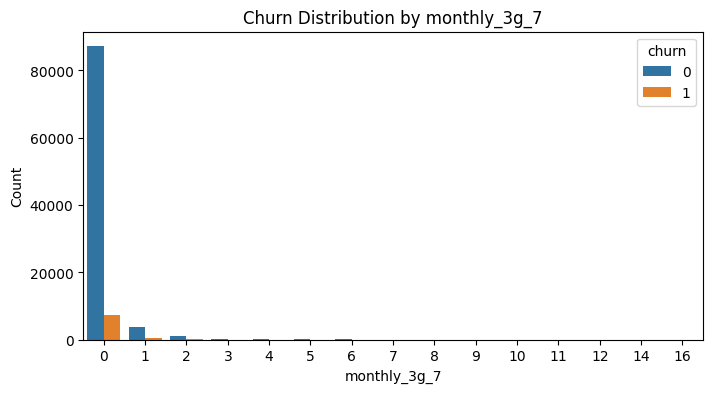

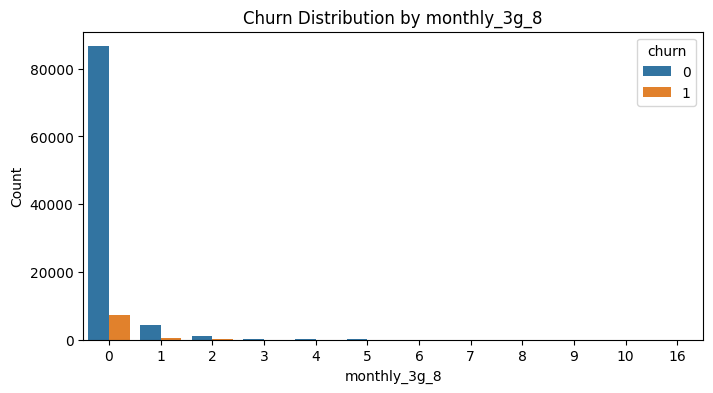

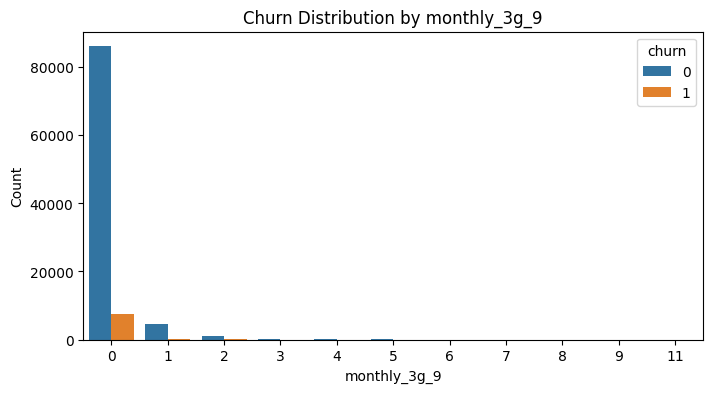

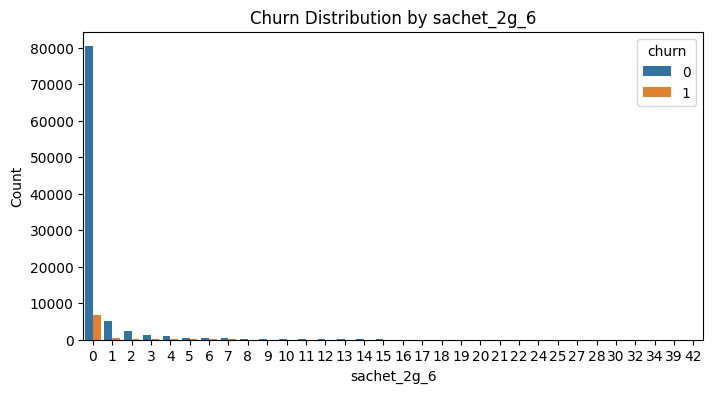

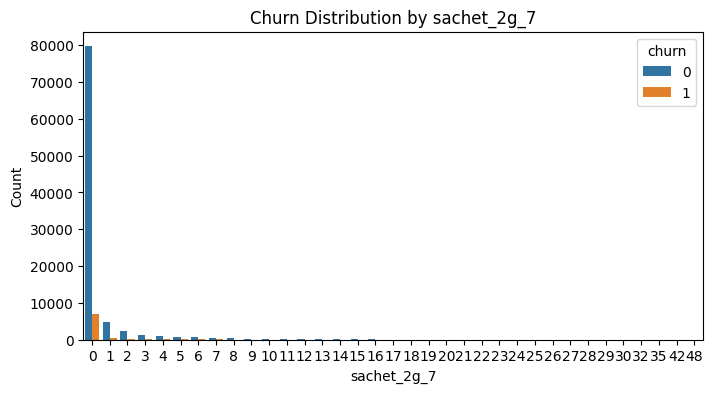

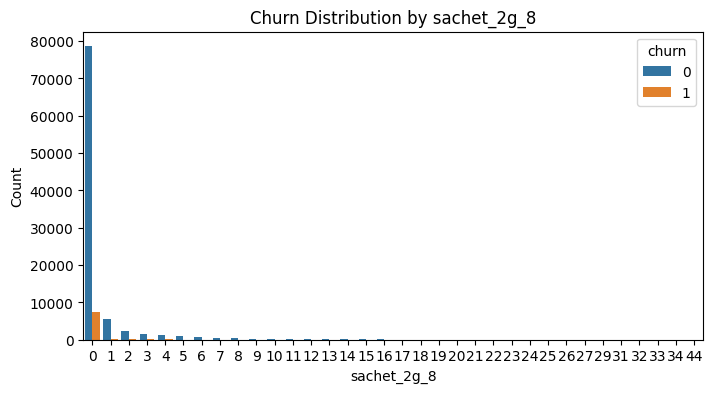

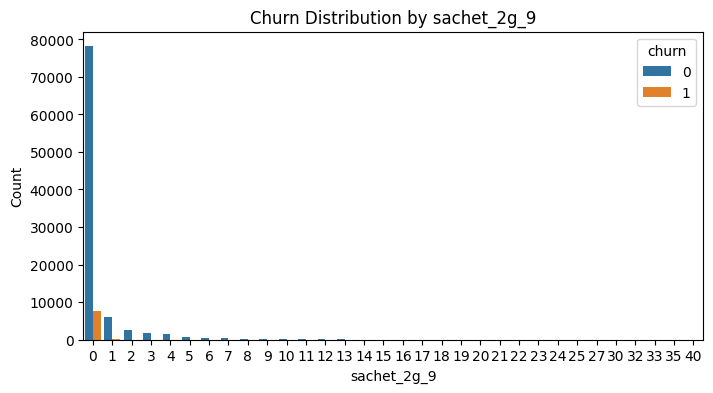

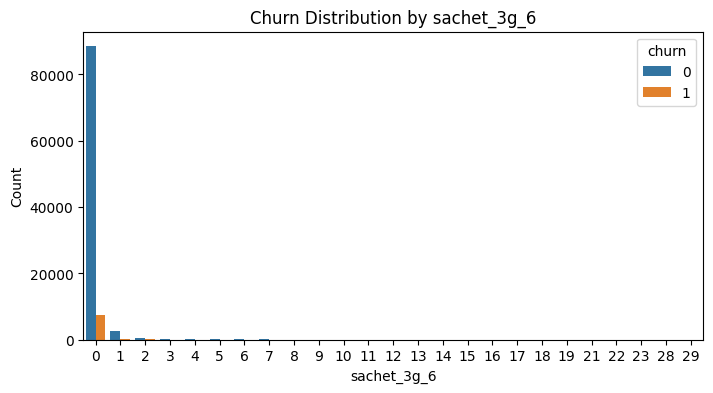

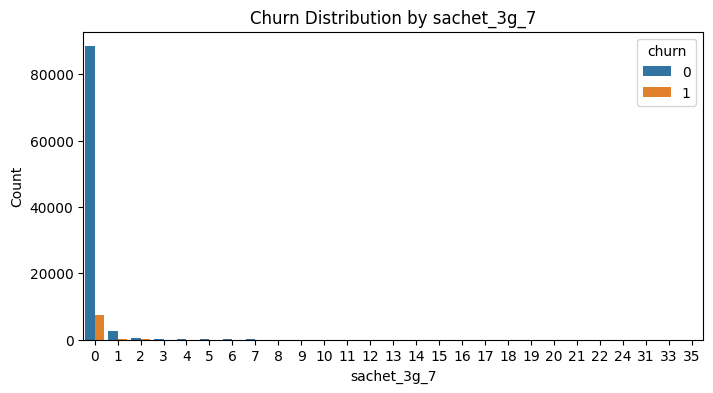

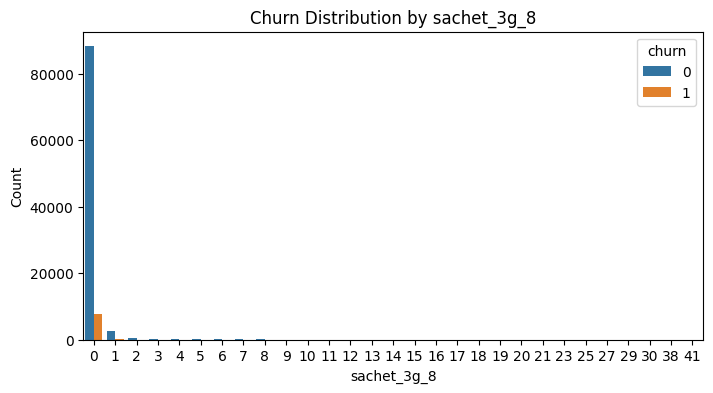

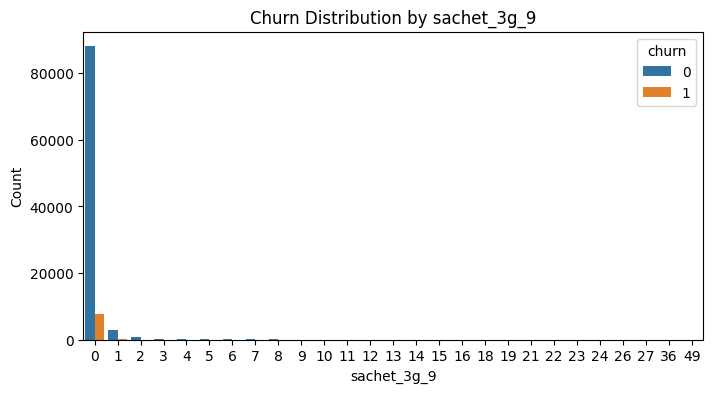

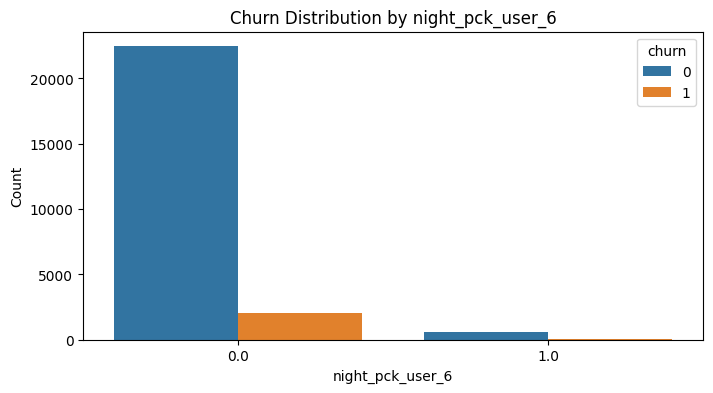

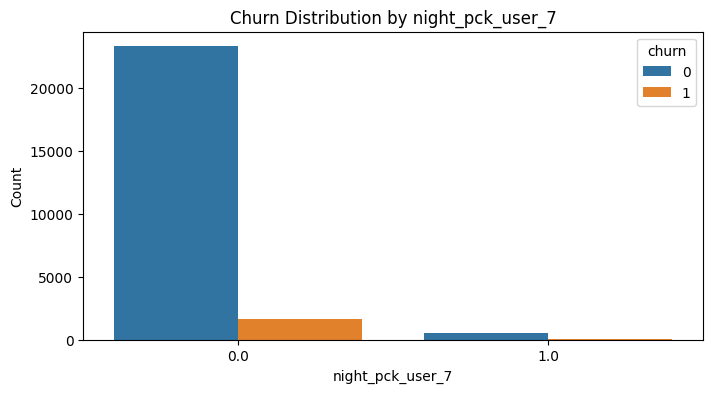

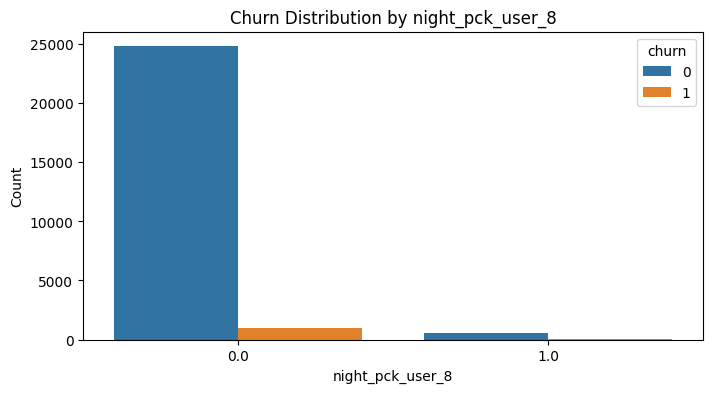

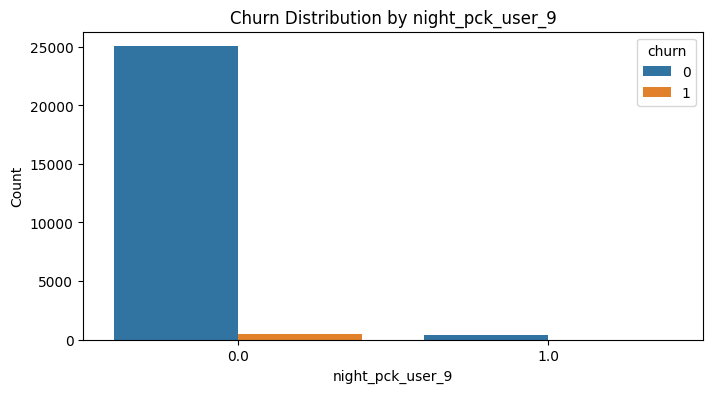

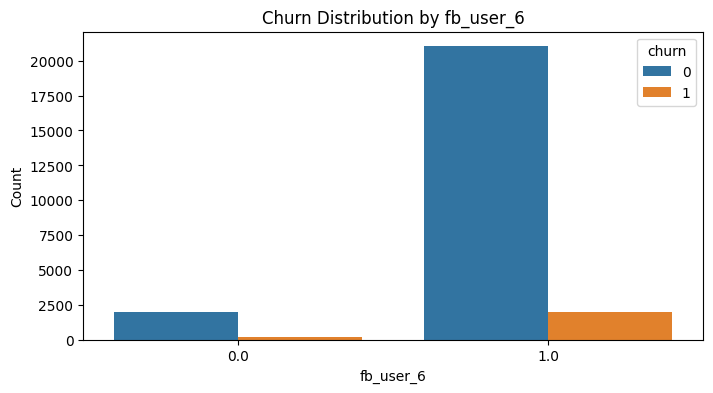

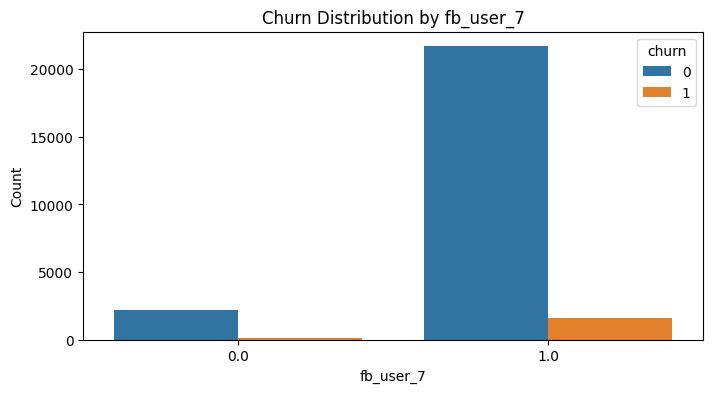

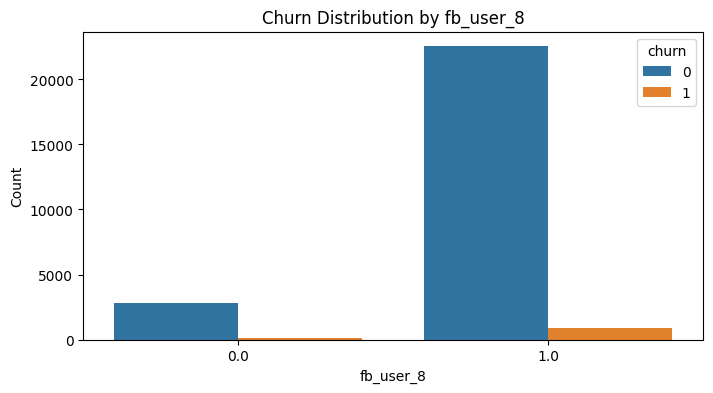

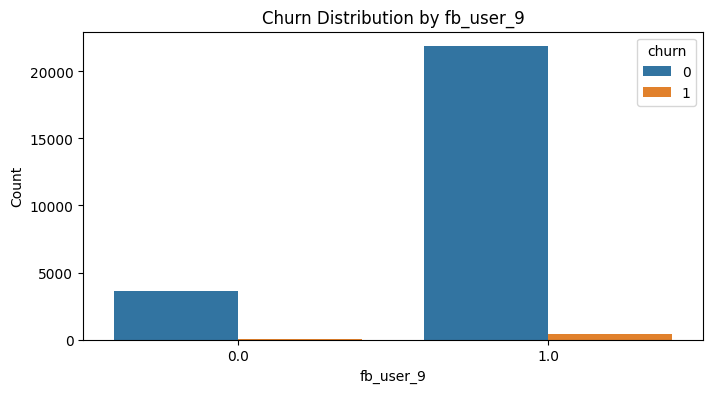

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset


# List of categorical features for analysis
categorical_features = [
    'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9',
    'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9',
    'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9',
    'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9',
    'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9',
    'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'
]

# Loop to create count plots for each feature against churn
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, hue='churn', data=telecom_churn_data)
    plt.title(f'Churn Distribution by {feature}')
    plt.ylabel('Count')
    plt.xlabel(feature)
    plt.show()


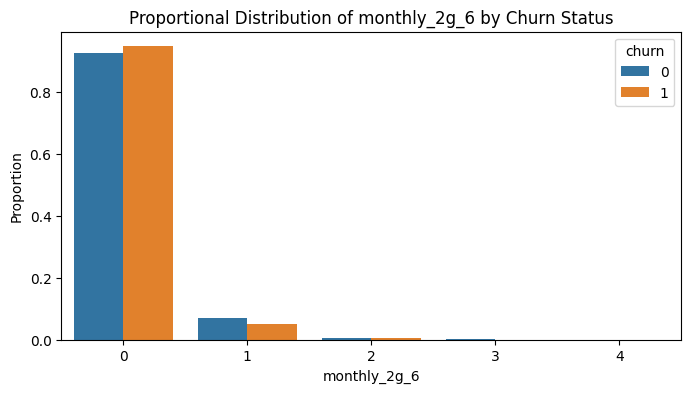

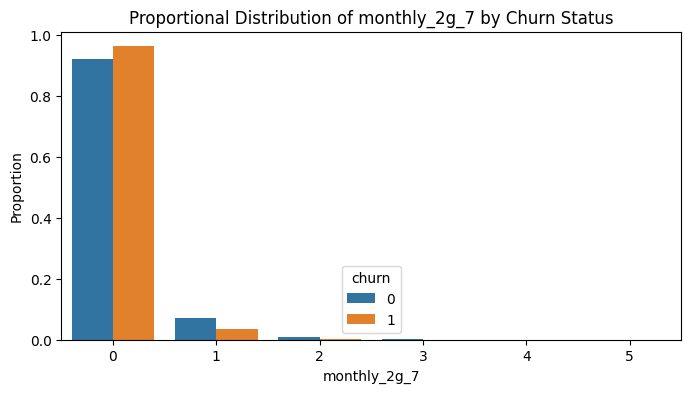

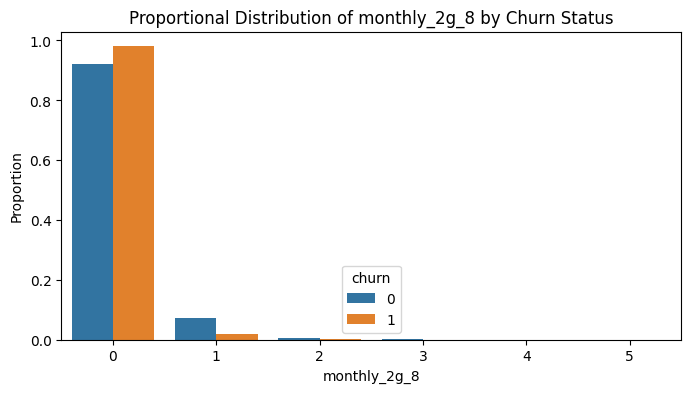

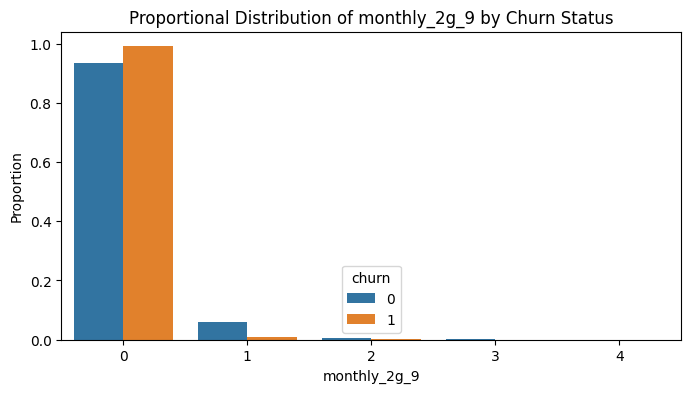

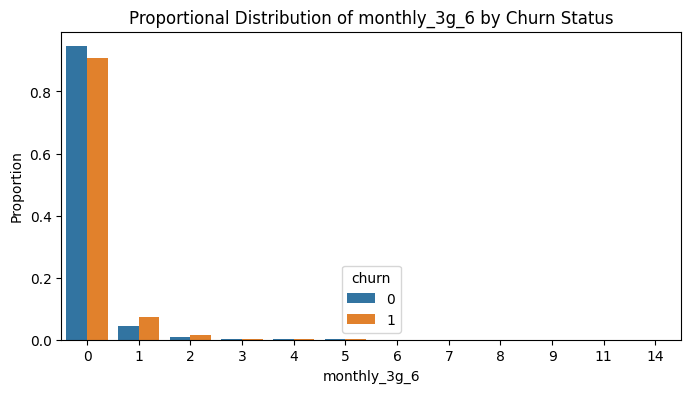

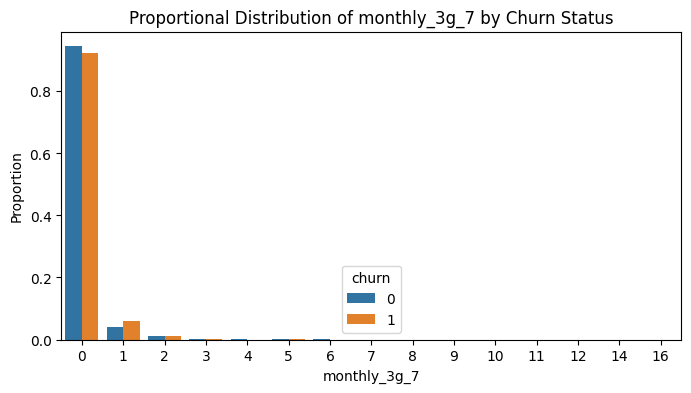

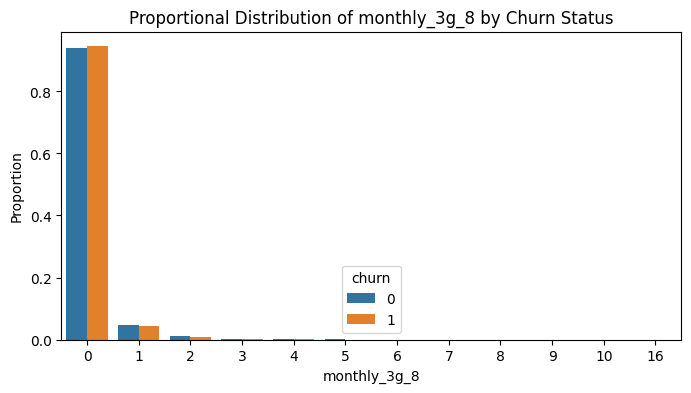

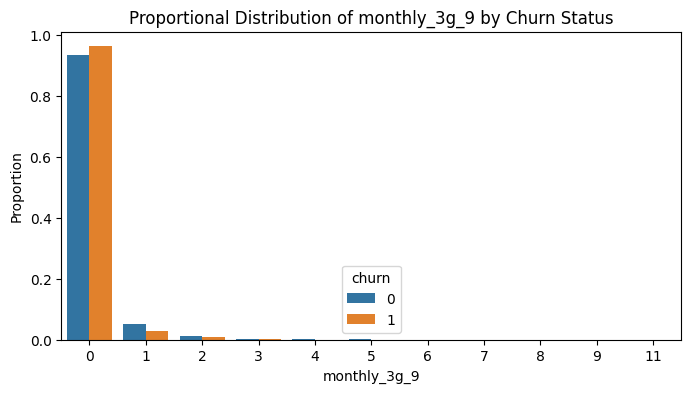

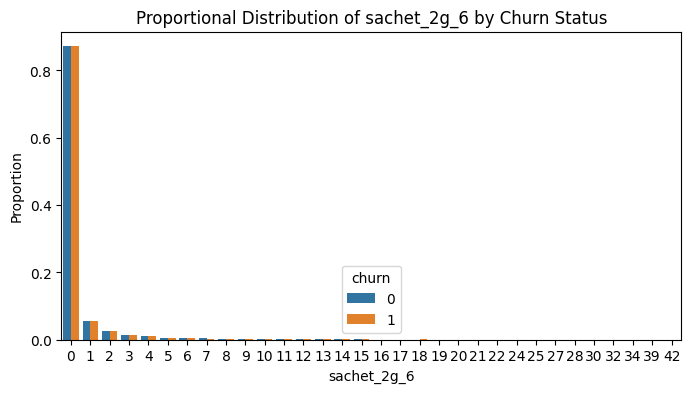

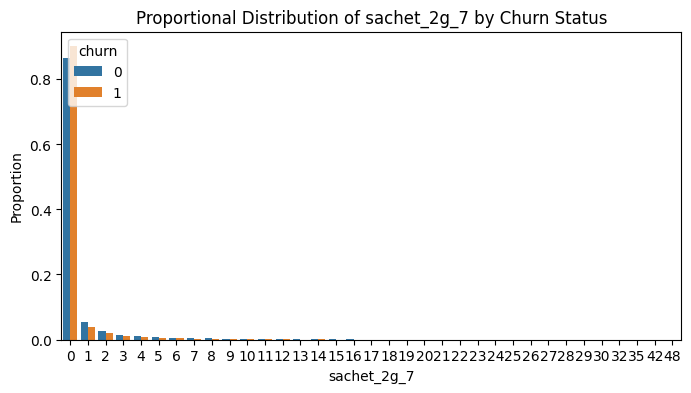

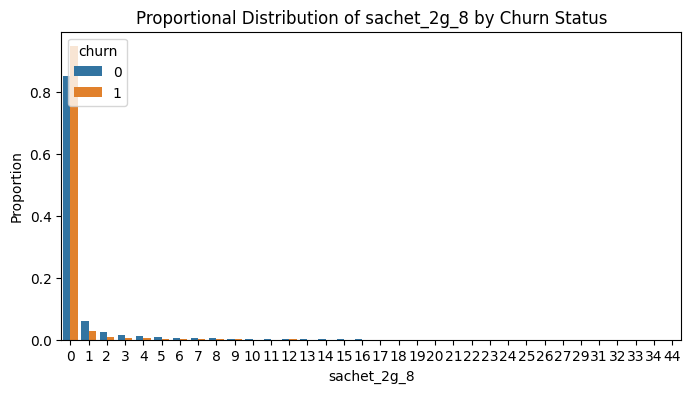

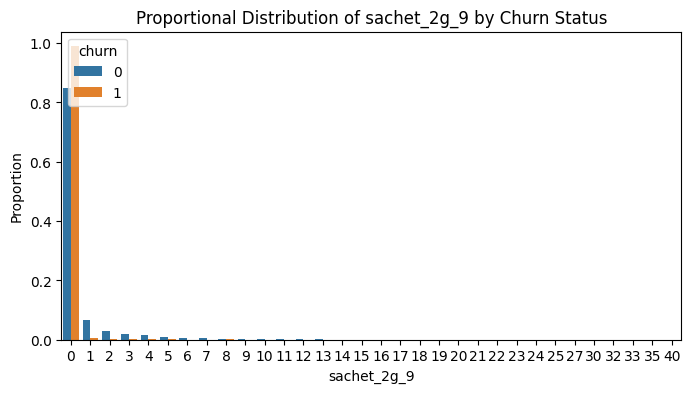

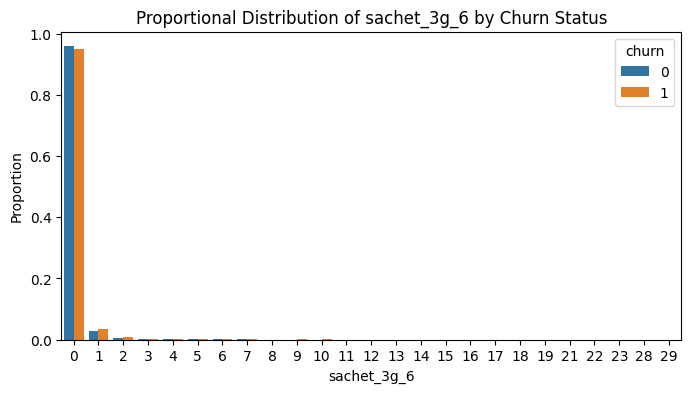

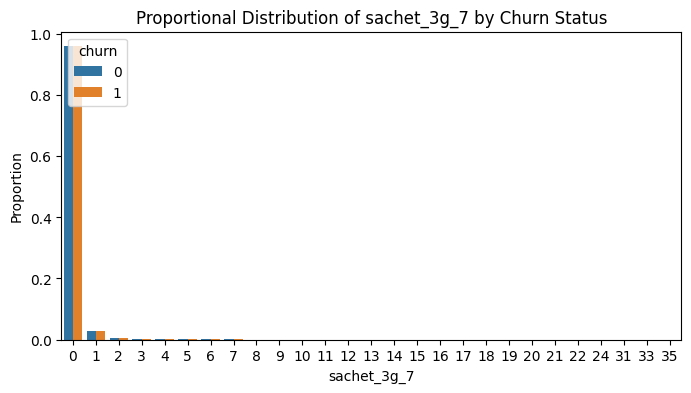

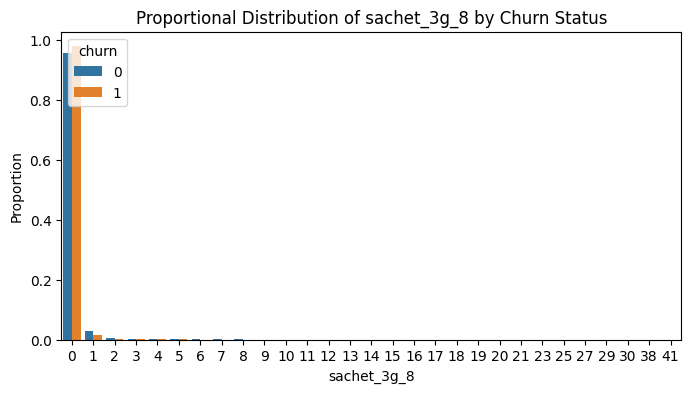

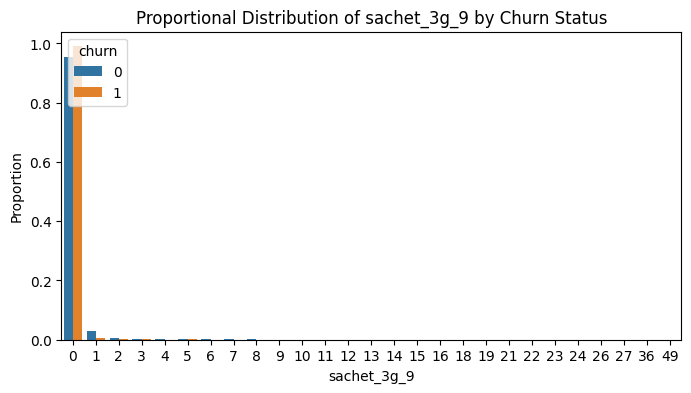

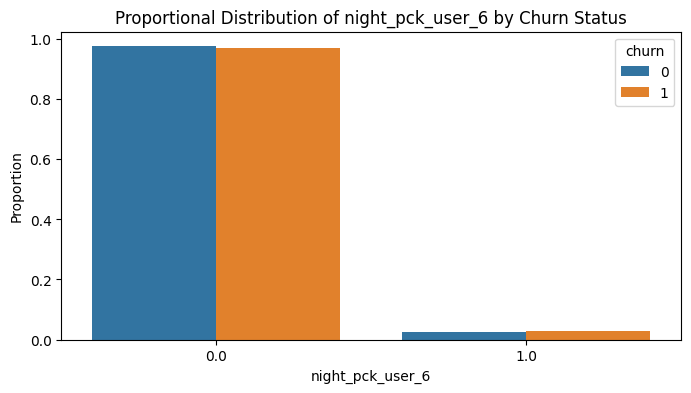

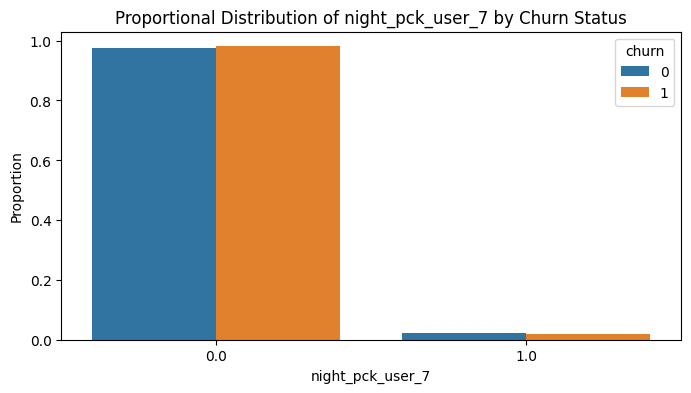

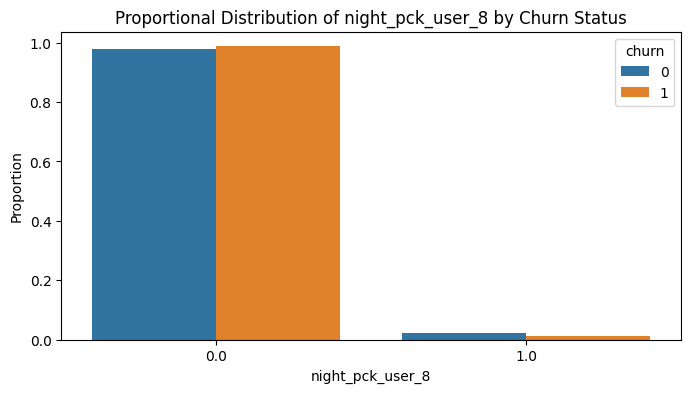

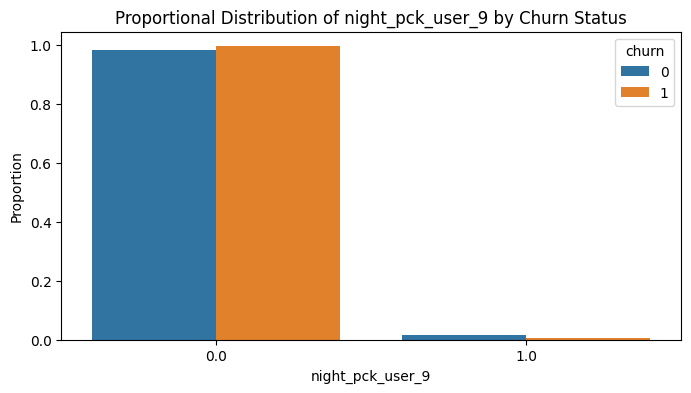

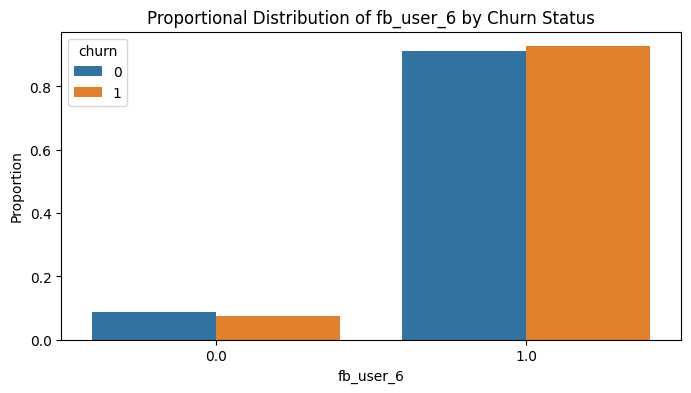

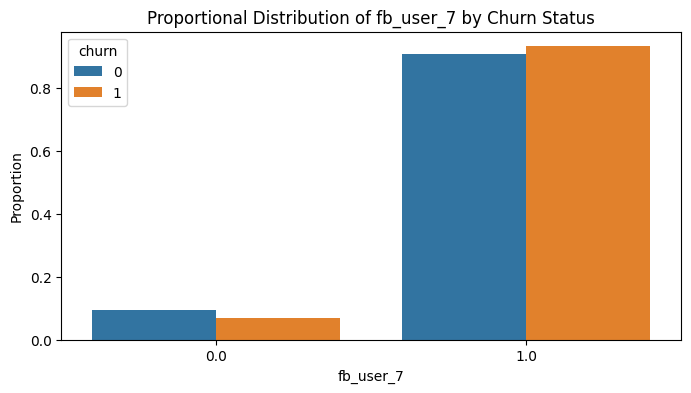

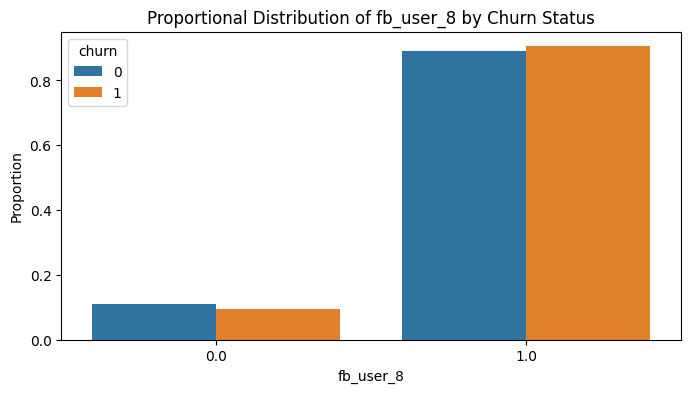

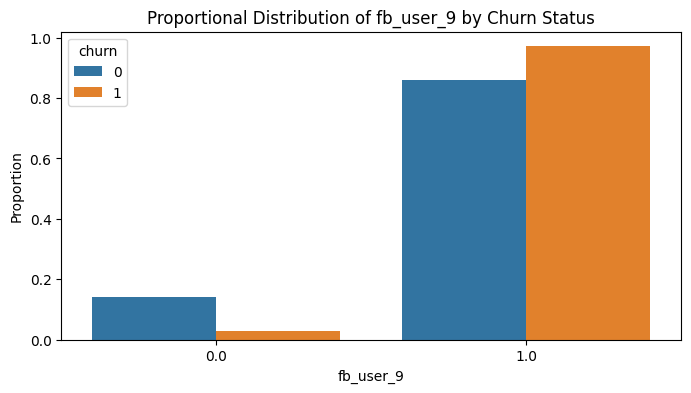

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming telecom_churn_data is your DataFrame and it's already loaded
# List of categorical features for analysis
categorical_features = [
    'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9',
    'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9',
    'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9',
    'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9',
    'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9',
    'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'
]

# Loop to create weighted count plots for each feature against churn
for feature in categorical_features:
    plt.figure(figsize=(8, 4))

    # Calculate proportions
    prop_df = (telecom_churn_data[feature]
               .groupby(telecom_churn_data['churn'])
               .value_counts(normalize=True)
               .rename('proportion')
               .reset_index())

    # Create a count plot with proportions
    sns.barplot(x=feature, y='proportion', hue='churn', data=prop_df)

    plt.title(f'Proportional Distribution of {feature} by Churn Status')
    plt.ylabel('Proportion')
    plt.xlabel(feature)
    plt.show()


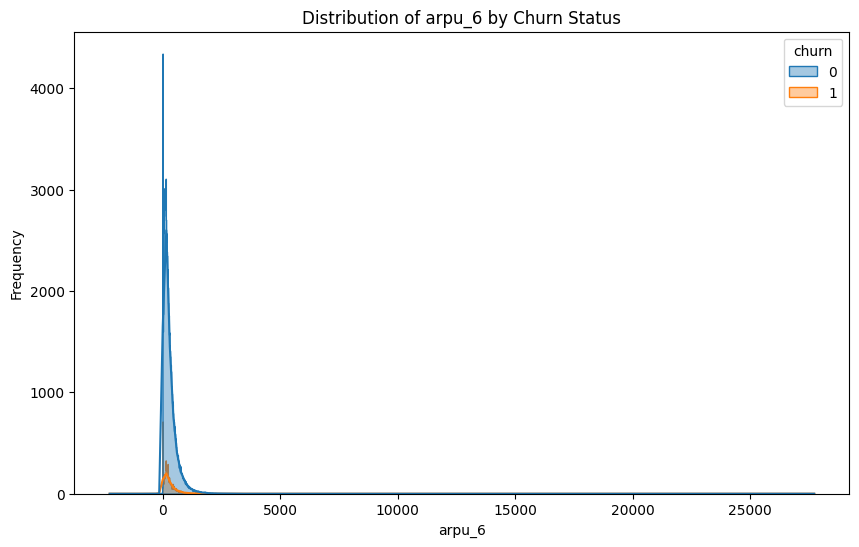

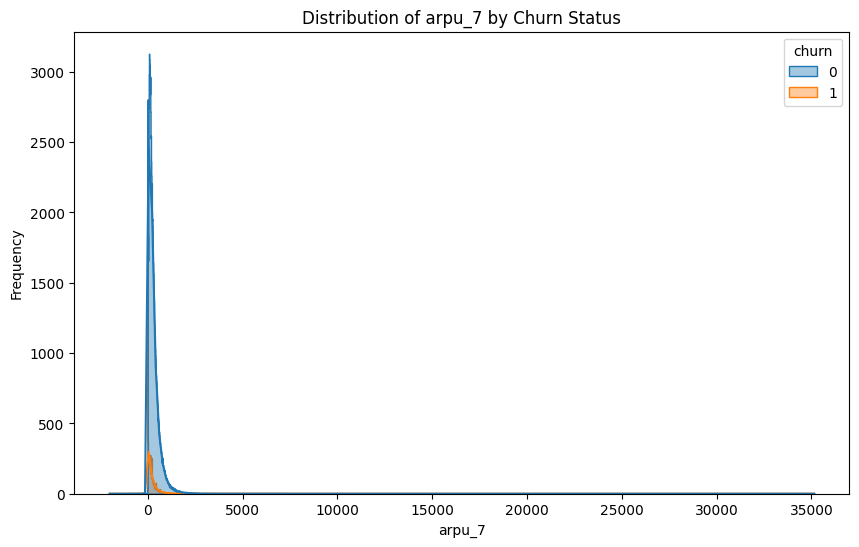

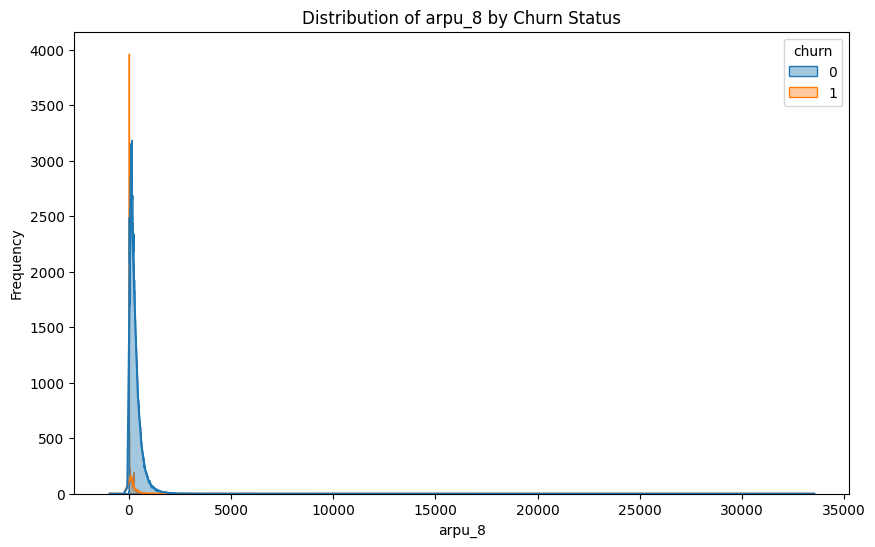

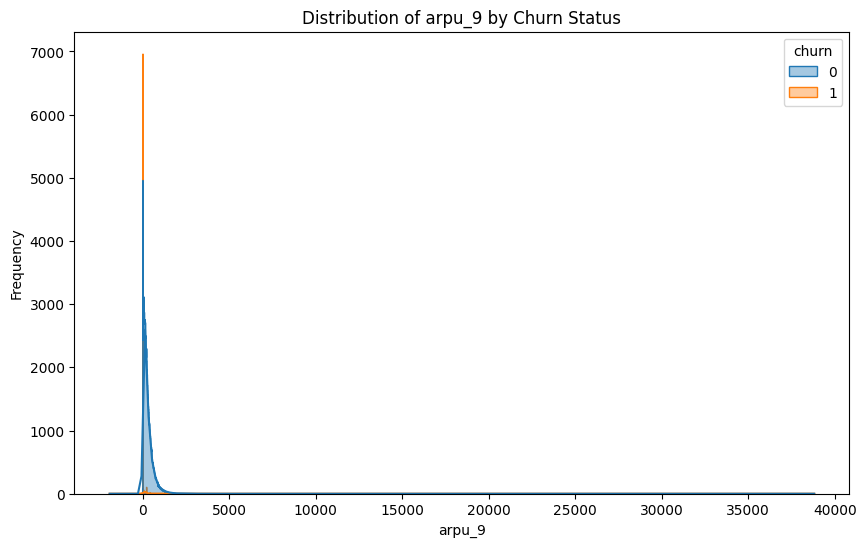

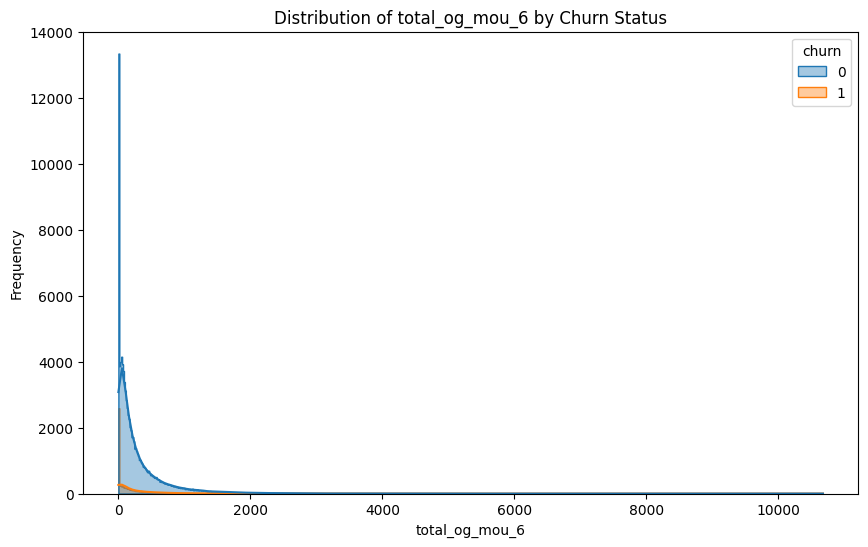

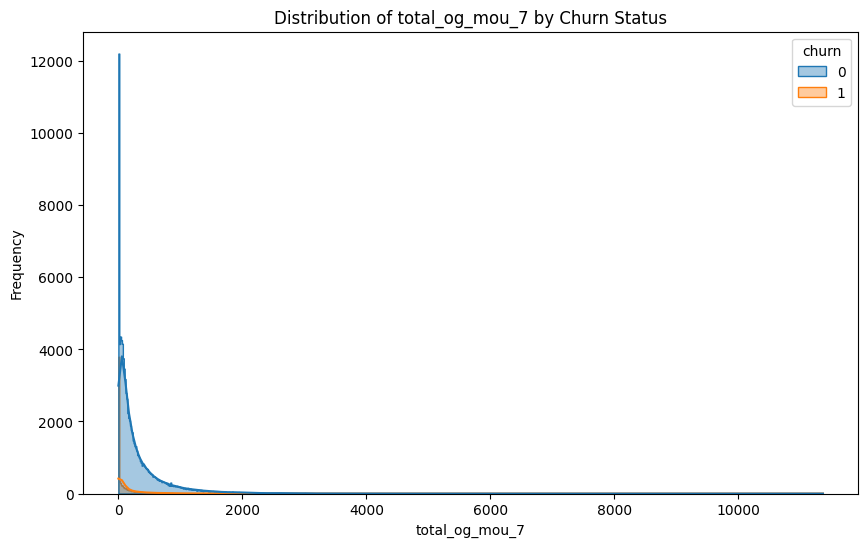

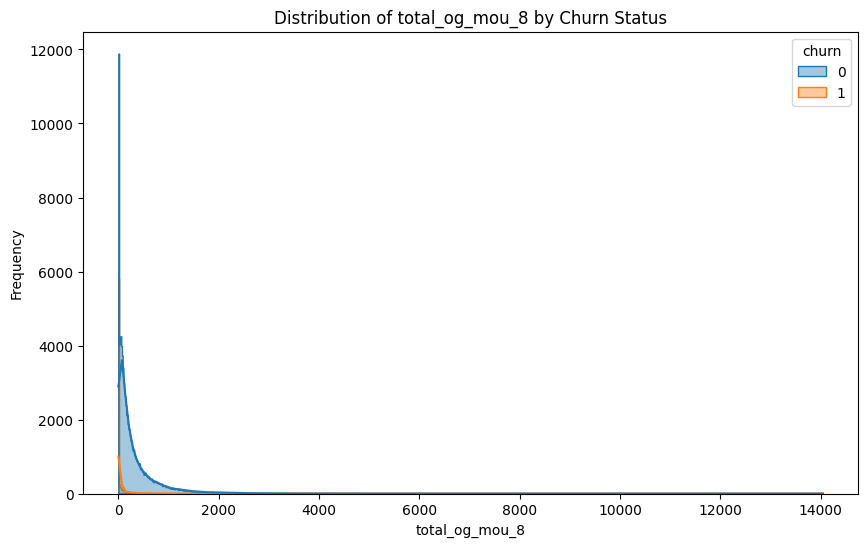

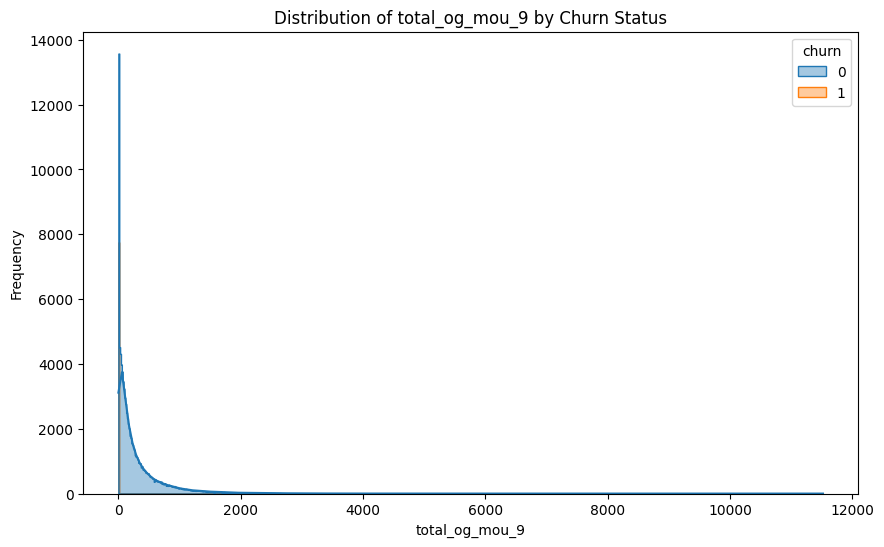

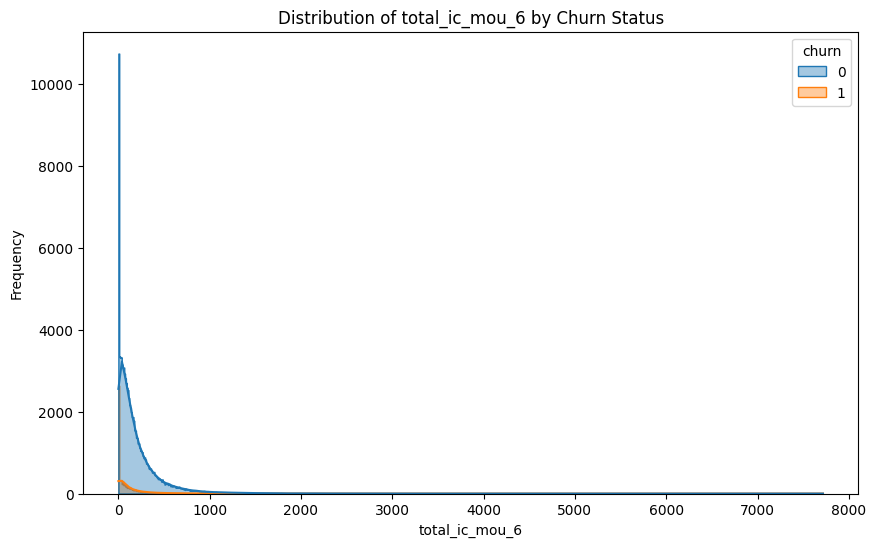

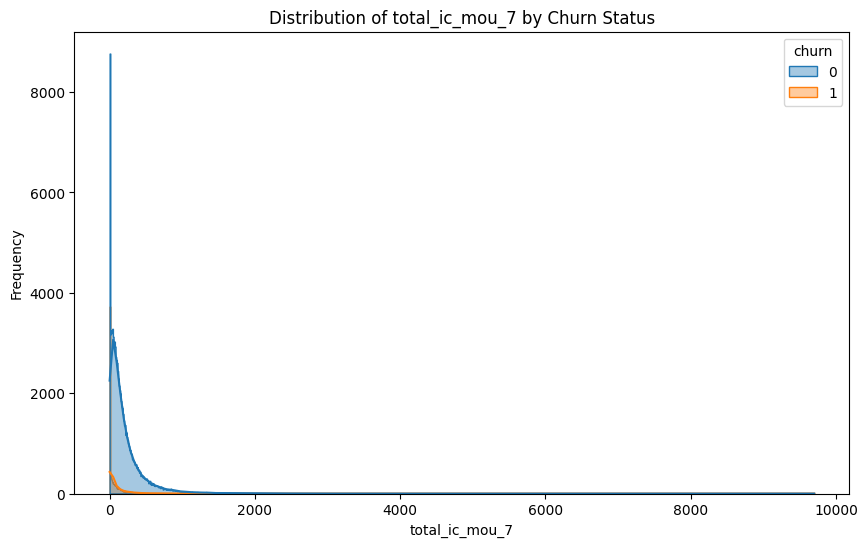

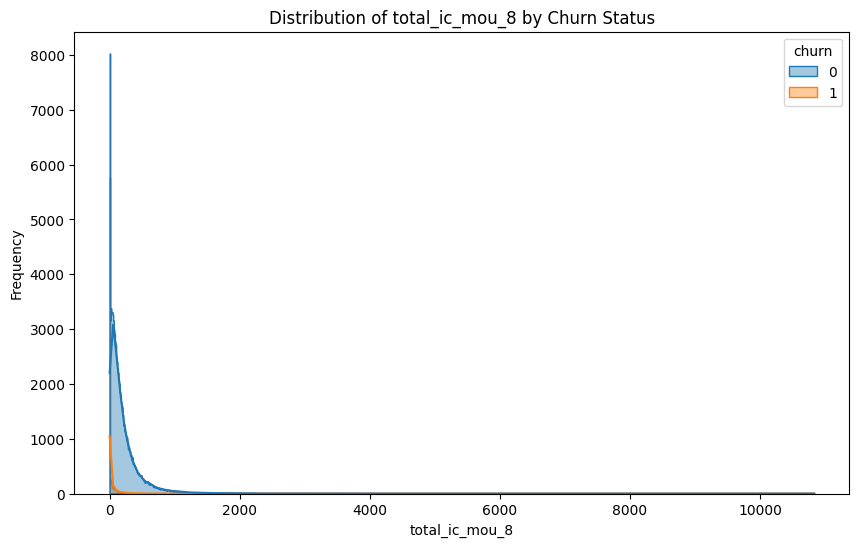

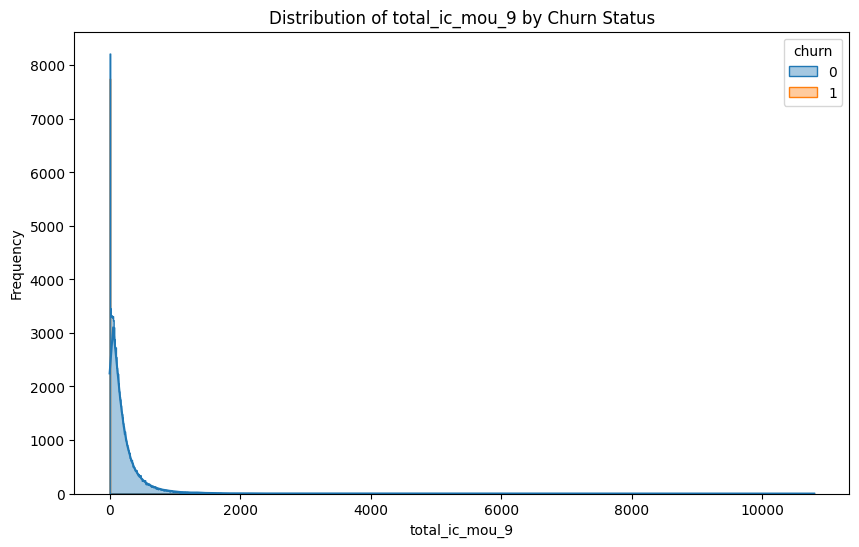

In [26]:
numerical_features = [
    'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9',
    'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9',
    'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_ic_mou_9'
]

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=telecom_churn_data, x=feature, hue='churn', element='step', kde=True, fill=True, alpha=0.4)
    plt.title(f'Distribution of {feature} by Churn Status')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


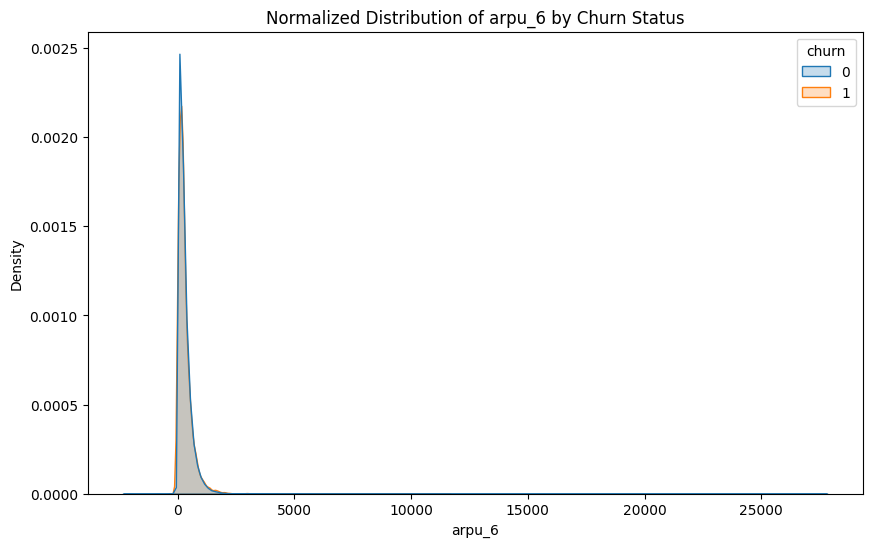

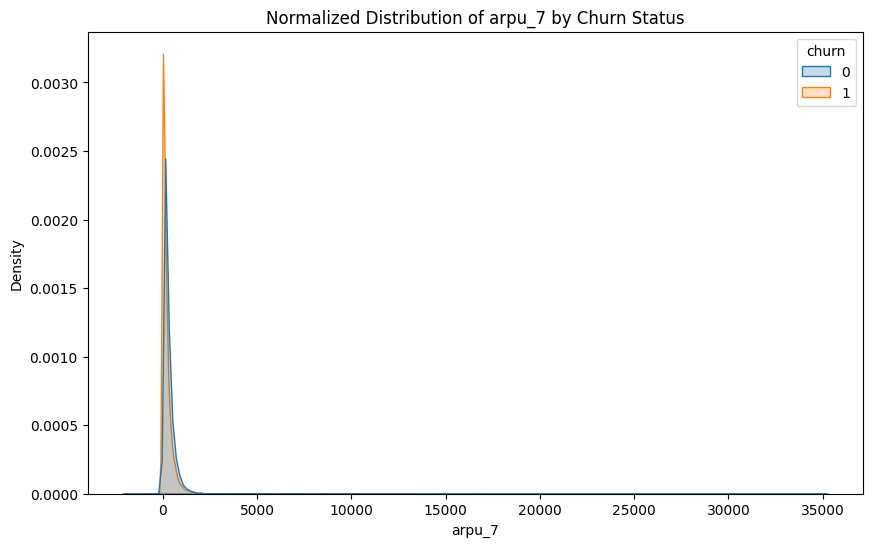

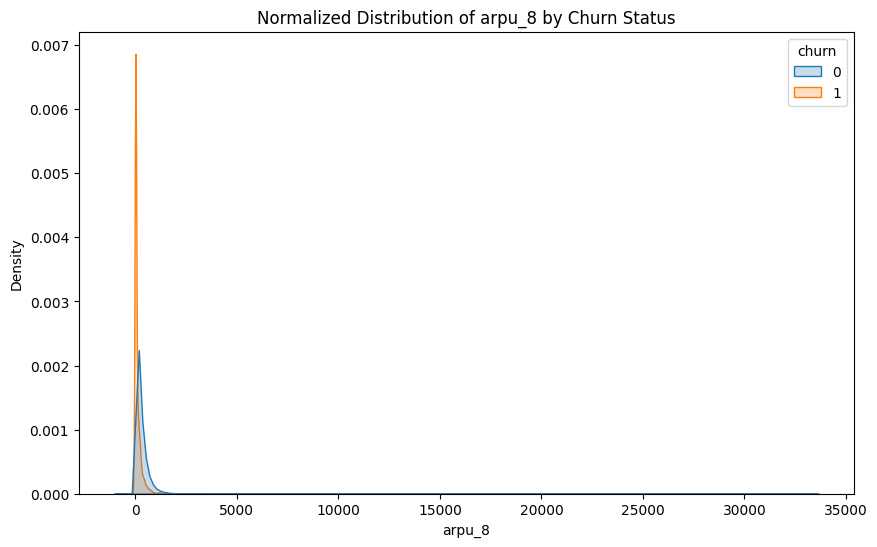

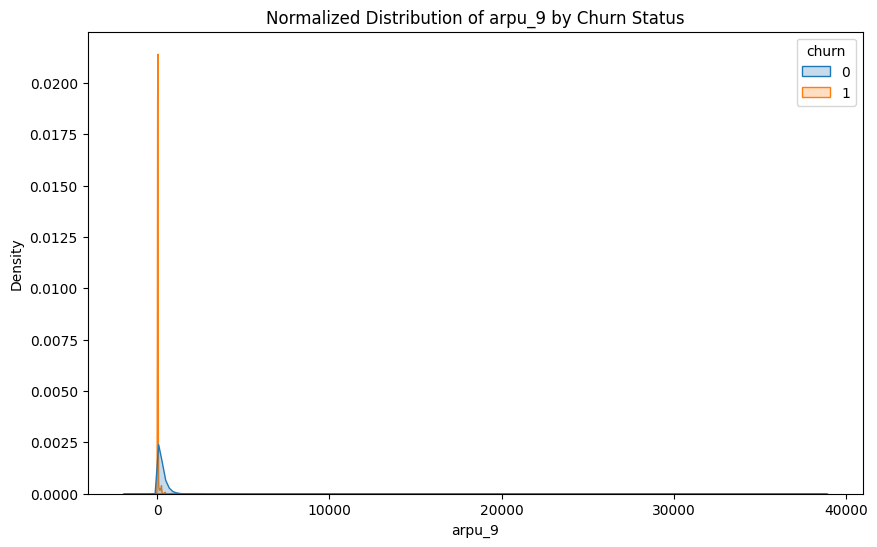

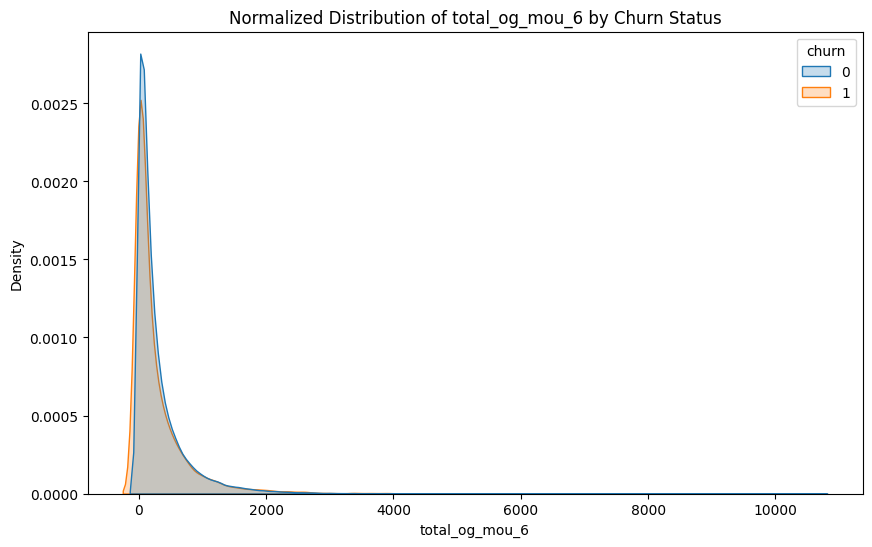

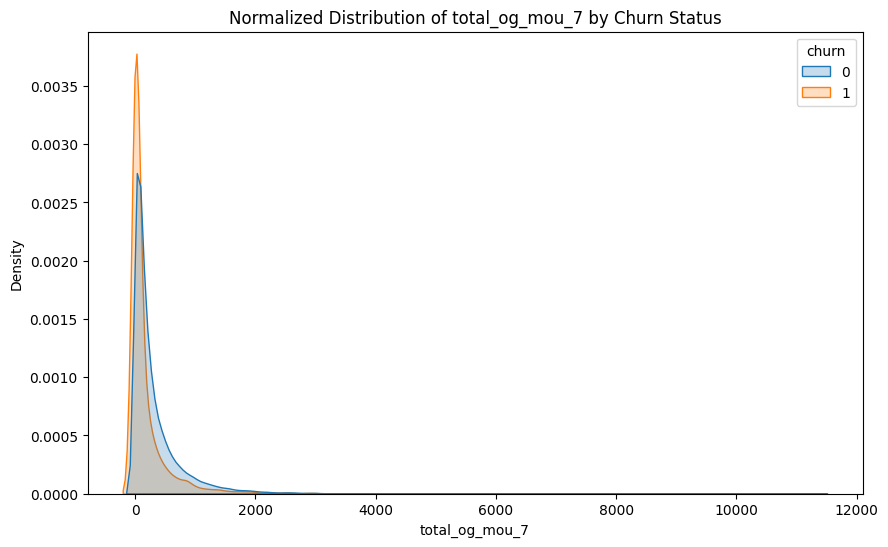

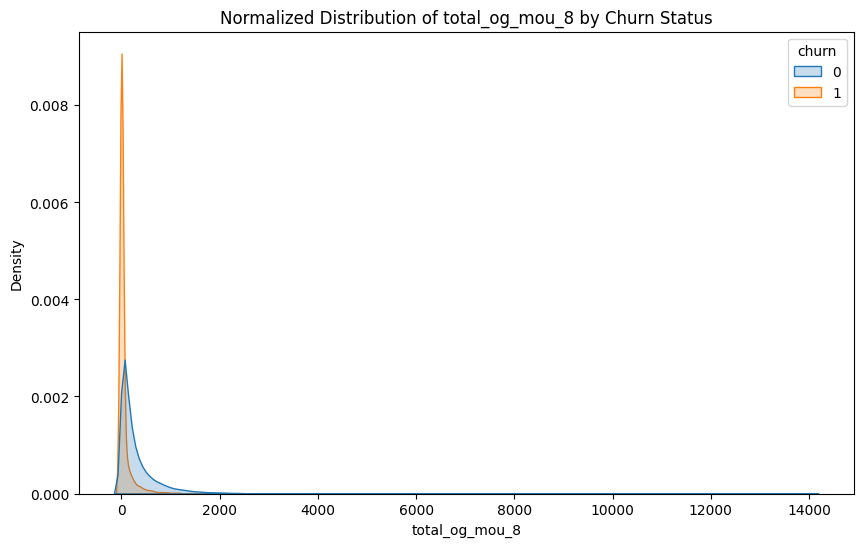

<ipython-input-27-5f48d3afd267>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=telecom_churn_data, x=feature, hue='churn', fill=True, common_norm=False)


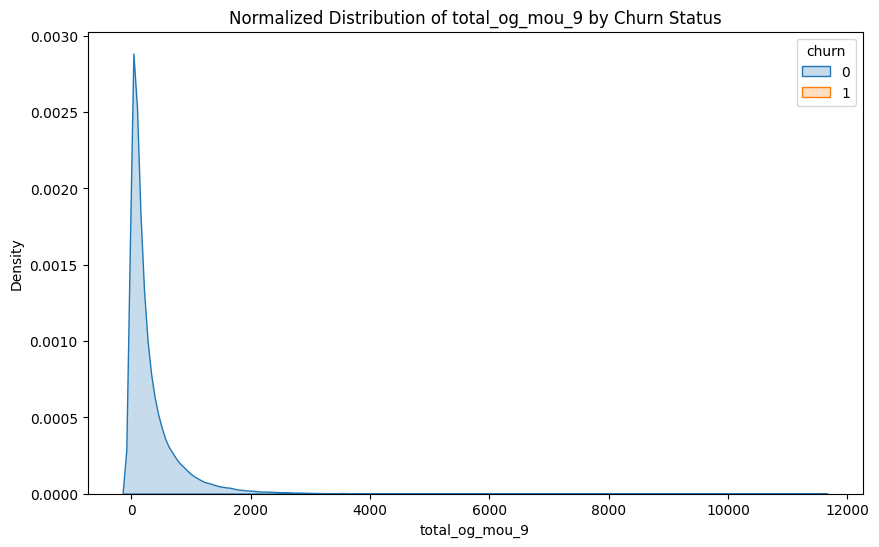

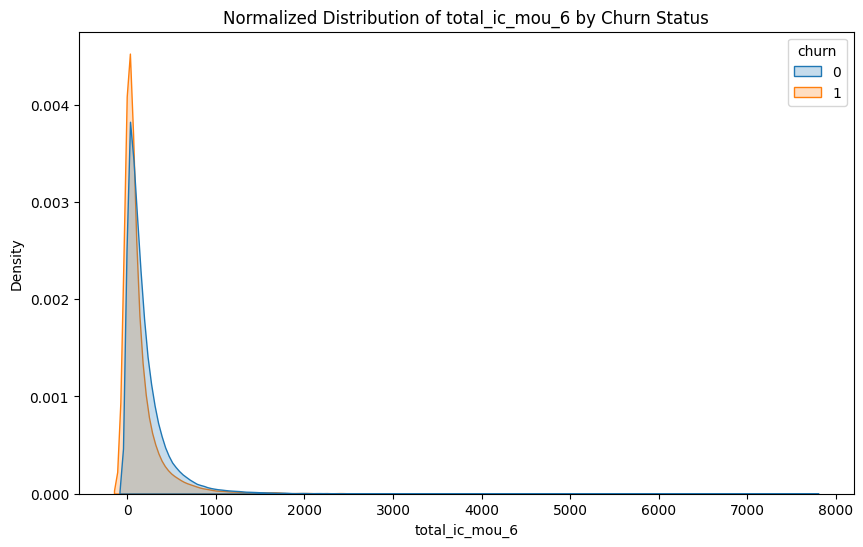

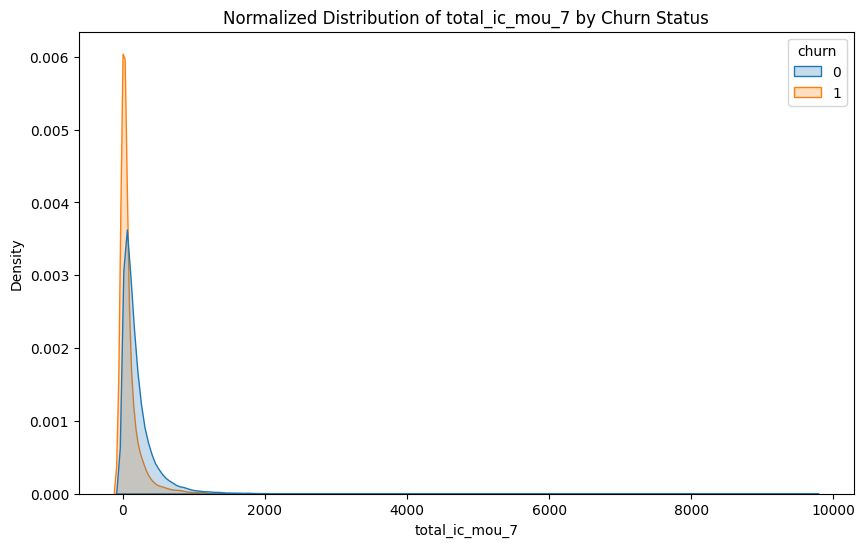

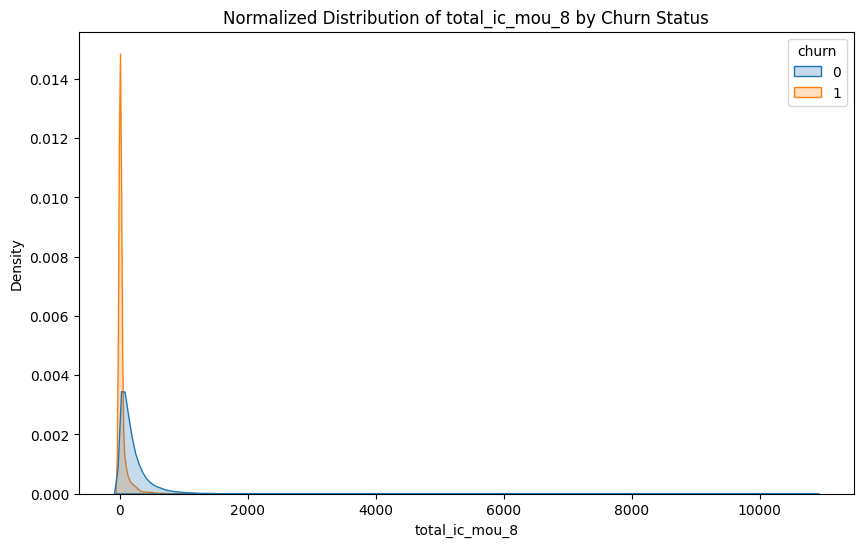

<ipython-input-27-5f48d3afd267>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=telecom_churn_data, x=feature, hue='churn', fill=True, common_norm=False)


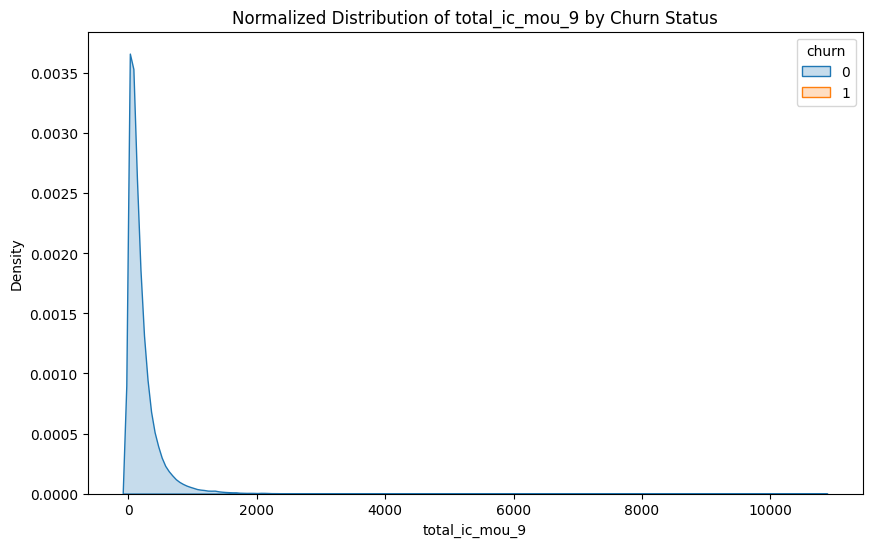

In [27]:
numerical_features = [
    'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9',
    'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9',
    'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_ic_mou_9'
]

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=telecom_churn_data, x=feature, hue='churn', fill=True, common_norm=False)
    plt.title(f'Normalized Distribution of {feature} by Churn Status')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


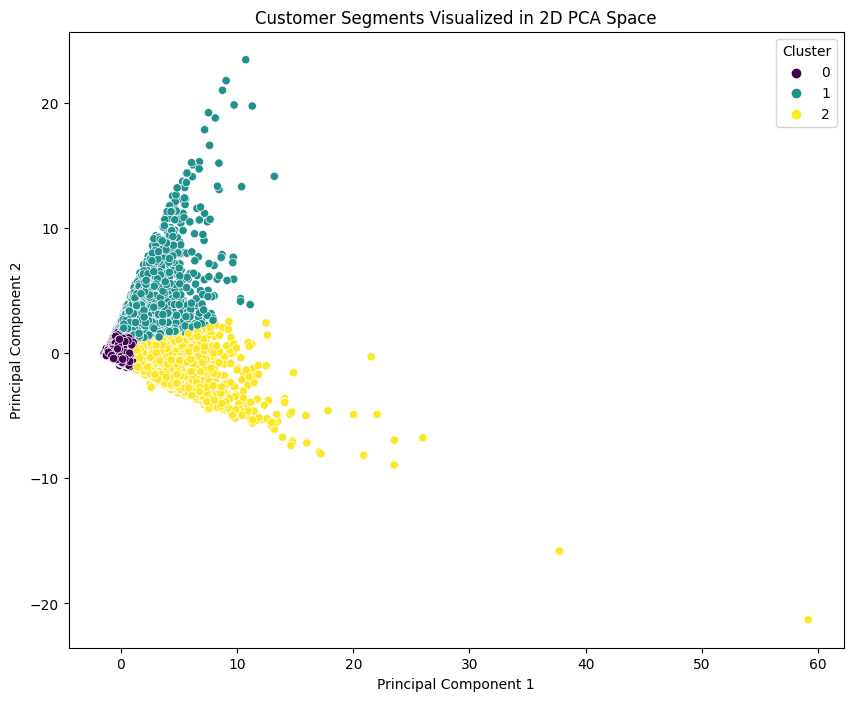

In [28]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset

# Step 1: Feature Selection
# Select features that are relevant for customer segmentation
features = [
    'arpu_6', 'total_og_mou_6', 'total_ic_mou_6',
    # Add more features as deemed relevant
]
data_for_clustering = telecom_churn_data[features]

# Step 2: Handling Missing Values
# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_for_clustering)

# Step 3: Scaling
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Step 4: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3)  # Example: using 3 clusters
clusters = kmeans.fit_predict(data_scaled)

# Step 5: Apply PCA for Visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Step 6: Plotting the Clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df)
plt.title('Customer Segments Visualized in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


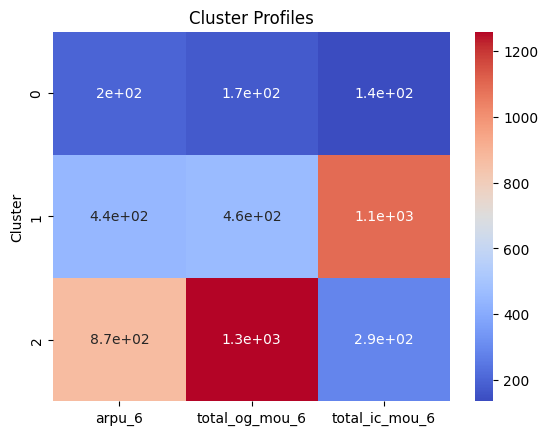

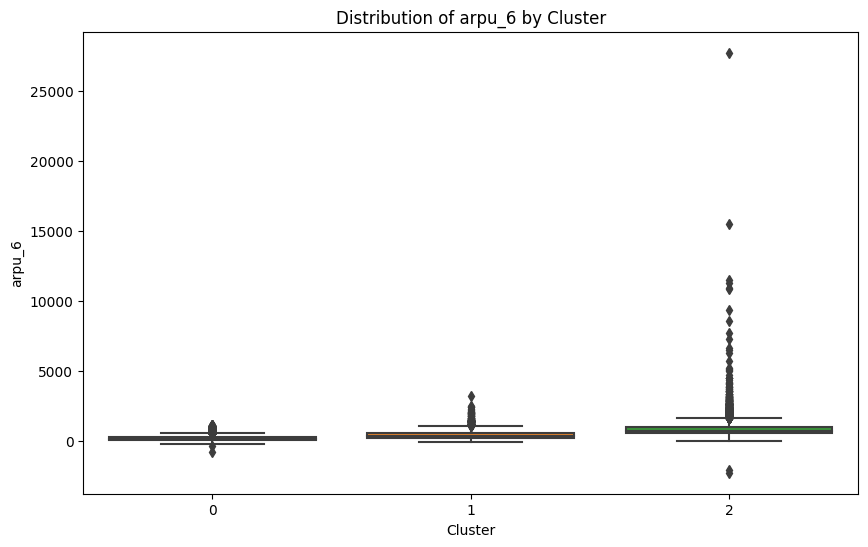

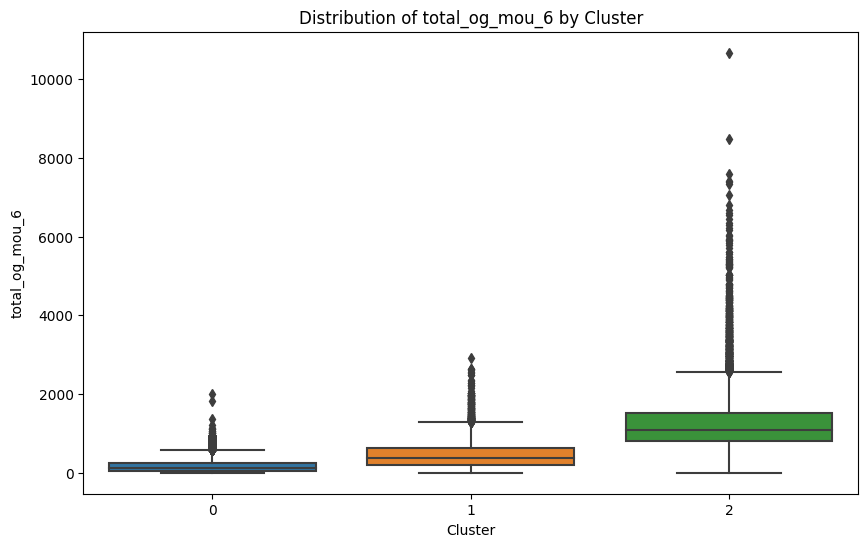

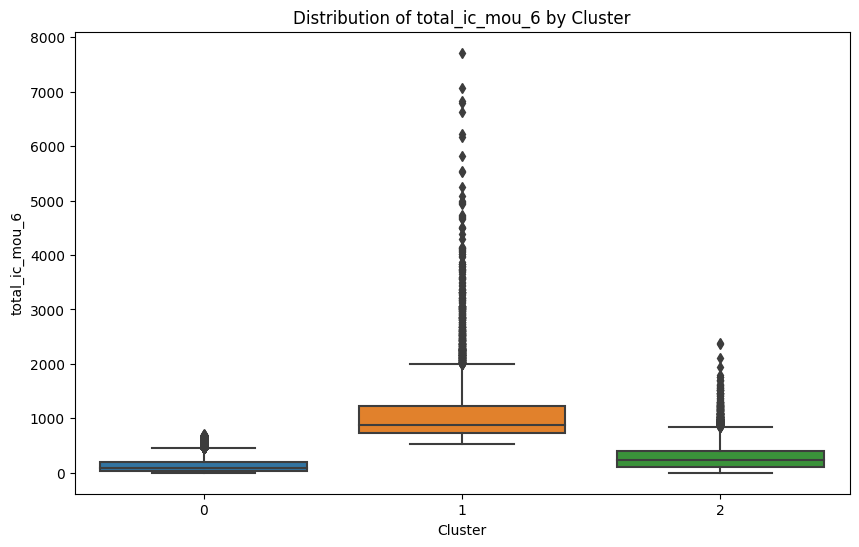

In [29]:
# Assuming K-Means and PCA have been applied and 'clusters' are the cluster labels

# Add cluster labels to the original dataset
telecom_churn_data['Cluster'] = clusters

# Analyze Cluster Profiles
cluster_profiles = telecom_churn_data.groupby('Cluster')[features].mean()

# Visualize the cluster profiles
sns.heatmap(cluster_profiles, annot=True, cmap='coolwarm')
plt.title('Cluster Profiles')
plt.show()

# Visualize Feature Distributions by Cluster
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=telecom_churn_data)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()


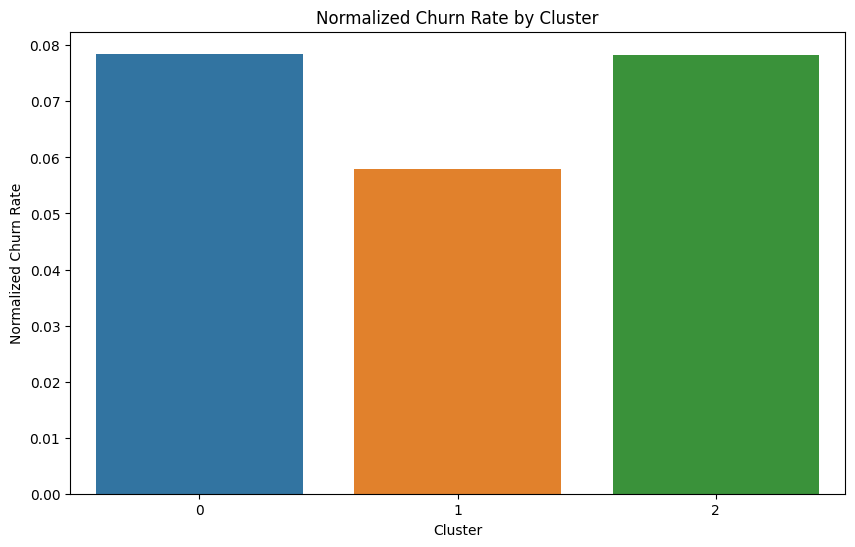

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# telecom_churn_data = pd.read_csv('/path/to/your/telecom_churn_data.csv')

# Calculating the total number of customers and the number of churned customers in each cluster
cluster_counts = telecom_churn_data['Cluster'].value_counts()
cluster_churn_counts = telecom_churn_data[telecom_churn_data['churn'] == 1]['Cluster'].value_counts()

# Normalizing the churn counts by the total counts in each cluster
normalized_churn_rate = (cluster_churn_counts / cluster_counts).reset_index()
normalized_churn_rate.columns = ['Cluster', 'Normalized Churn Rate']

# Plotting the normalized churn rate for each cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Normalized Churn Rate', data=normalized_churn_rate)
plt.title('Normalized Churn Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Normalized Churn Rate')
plt.show()
